# <h1> Import dataset

In [55]:
# link dataset: https://data.cityofnewyork.us/Transportation/2020-Green-Taxi-Trip-Data/pkmi-4kfn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
path="/content/drive/MyDrive/DS105/Do_An/"

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [58]:
#loading dataset
df_step4=pd.read_csv(path+"dataset/finall_data.csv",index_col=False)

# <h1> 4. Trực quan bộ dữ liệu

## <h2> 4.2 Trực quan dữ liệu đa biến

In [59]:
cat_col=list(df_step4.select_dtypes(["int64"]).columns)
cat_col

['VendorID',
 'store_and_fwd_flag',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'improvement_surcharge',
 'payment_type',
 'trip_type',
 'pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'dropoff_month',
 'dropoff_weekday',
 'dropoff_hour']

In [60]:
con_col=list(df_step4.select_dtypes(["float64"]).columns)
con_col

['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'trip_duration']

###4.2.1 Trực quan các đơn biến liên tục với thuộc tính tip_amount

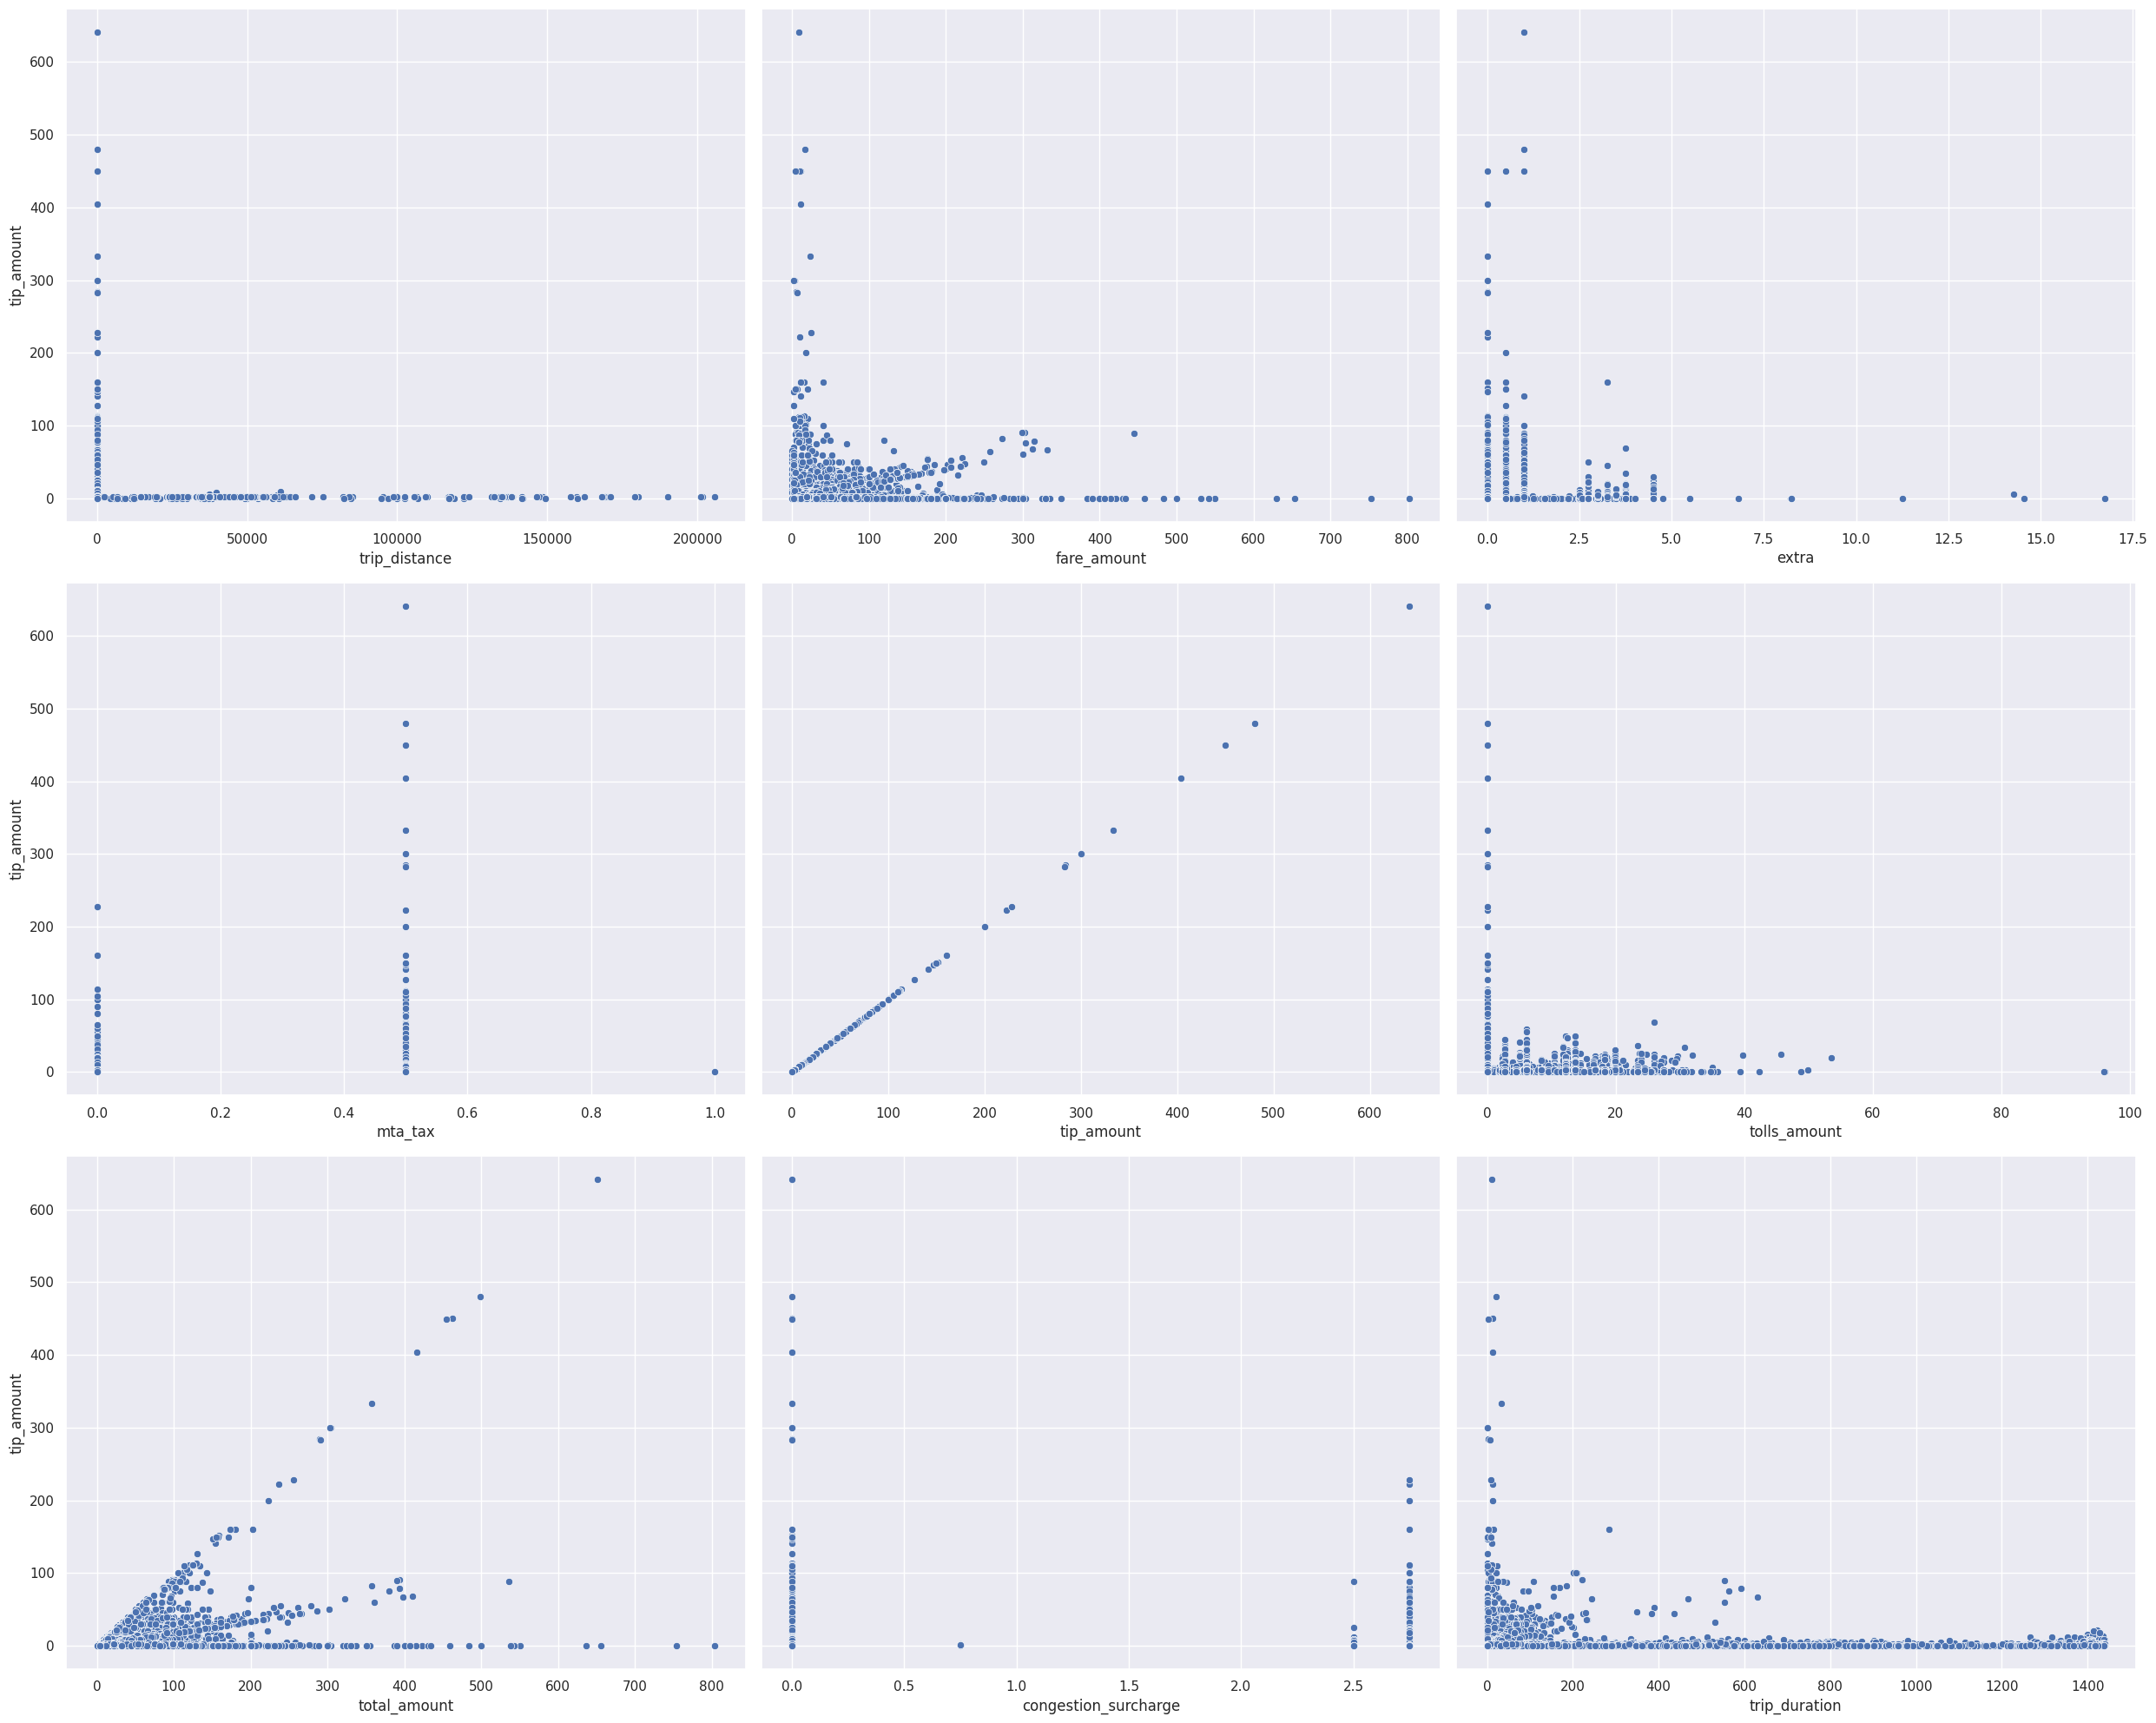

In [61]:
x=con_col
data=df_step4
y="tip_amount"
f,ax=plt.subplots(round(len(x)/3),3,figsize=(25,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(20,10)})
  p=sns.scatterplot(x=i,data=data,y=y,ax=a)
  # p.set_ylim(0,64.12)

  p.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_continuous_variable_with '+y+ ' .png')


###4.2.2 Visualize continuous variables with total amount

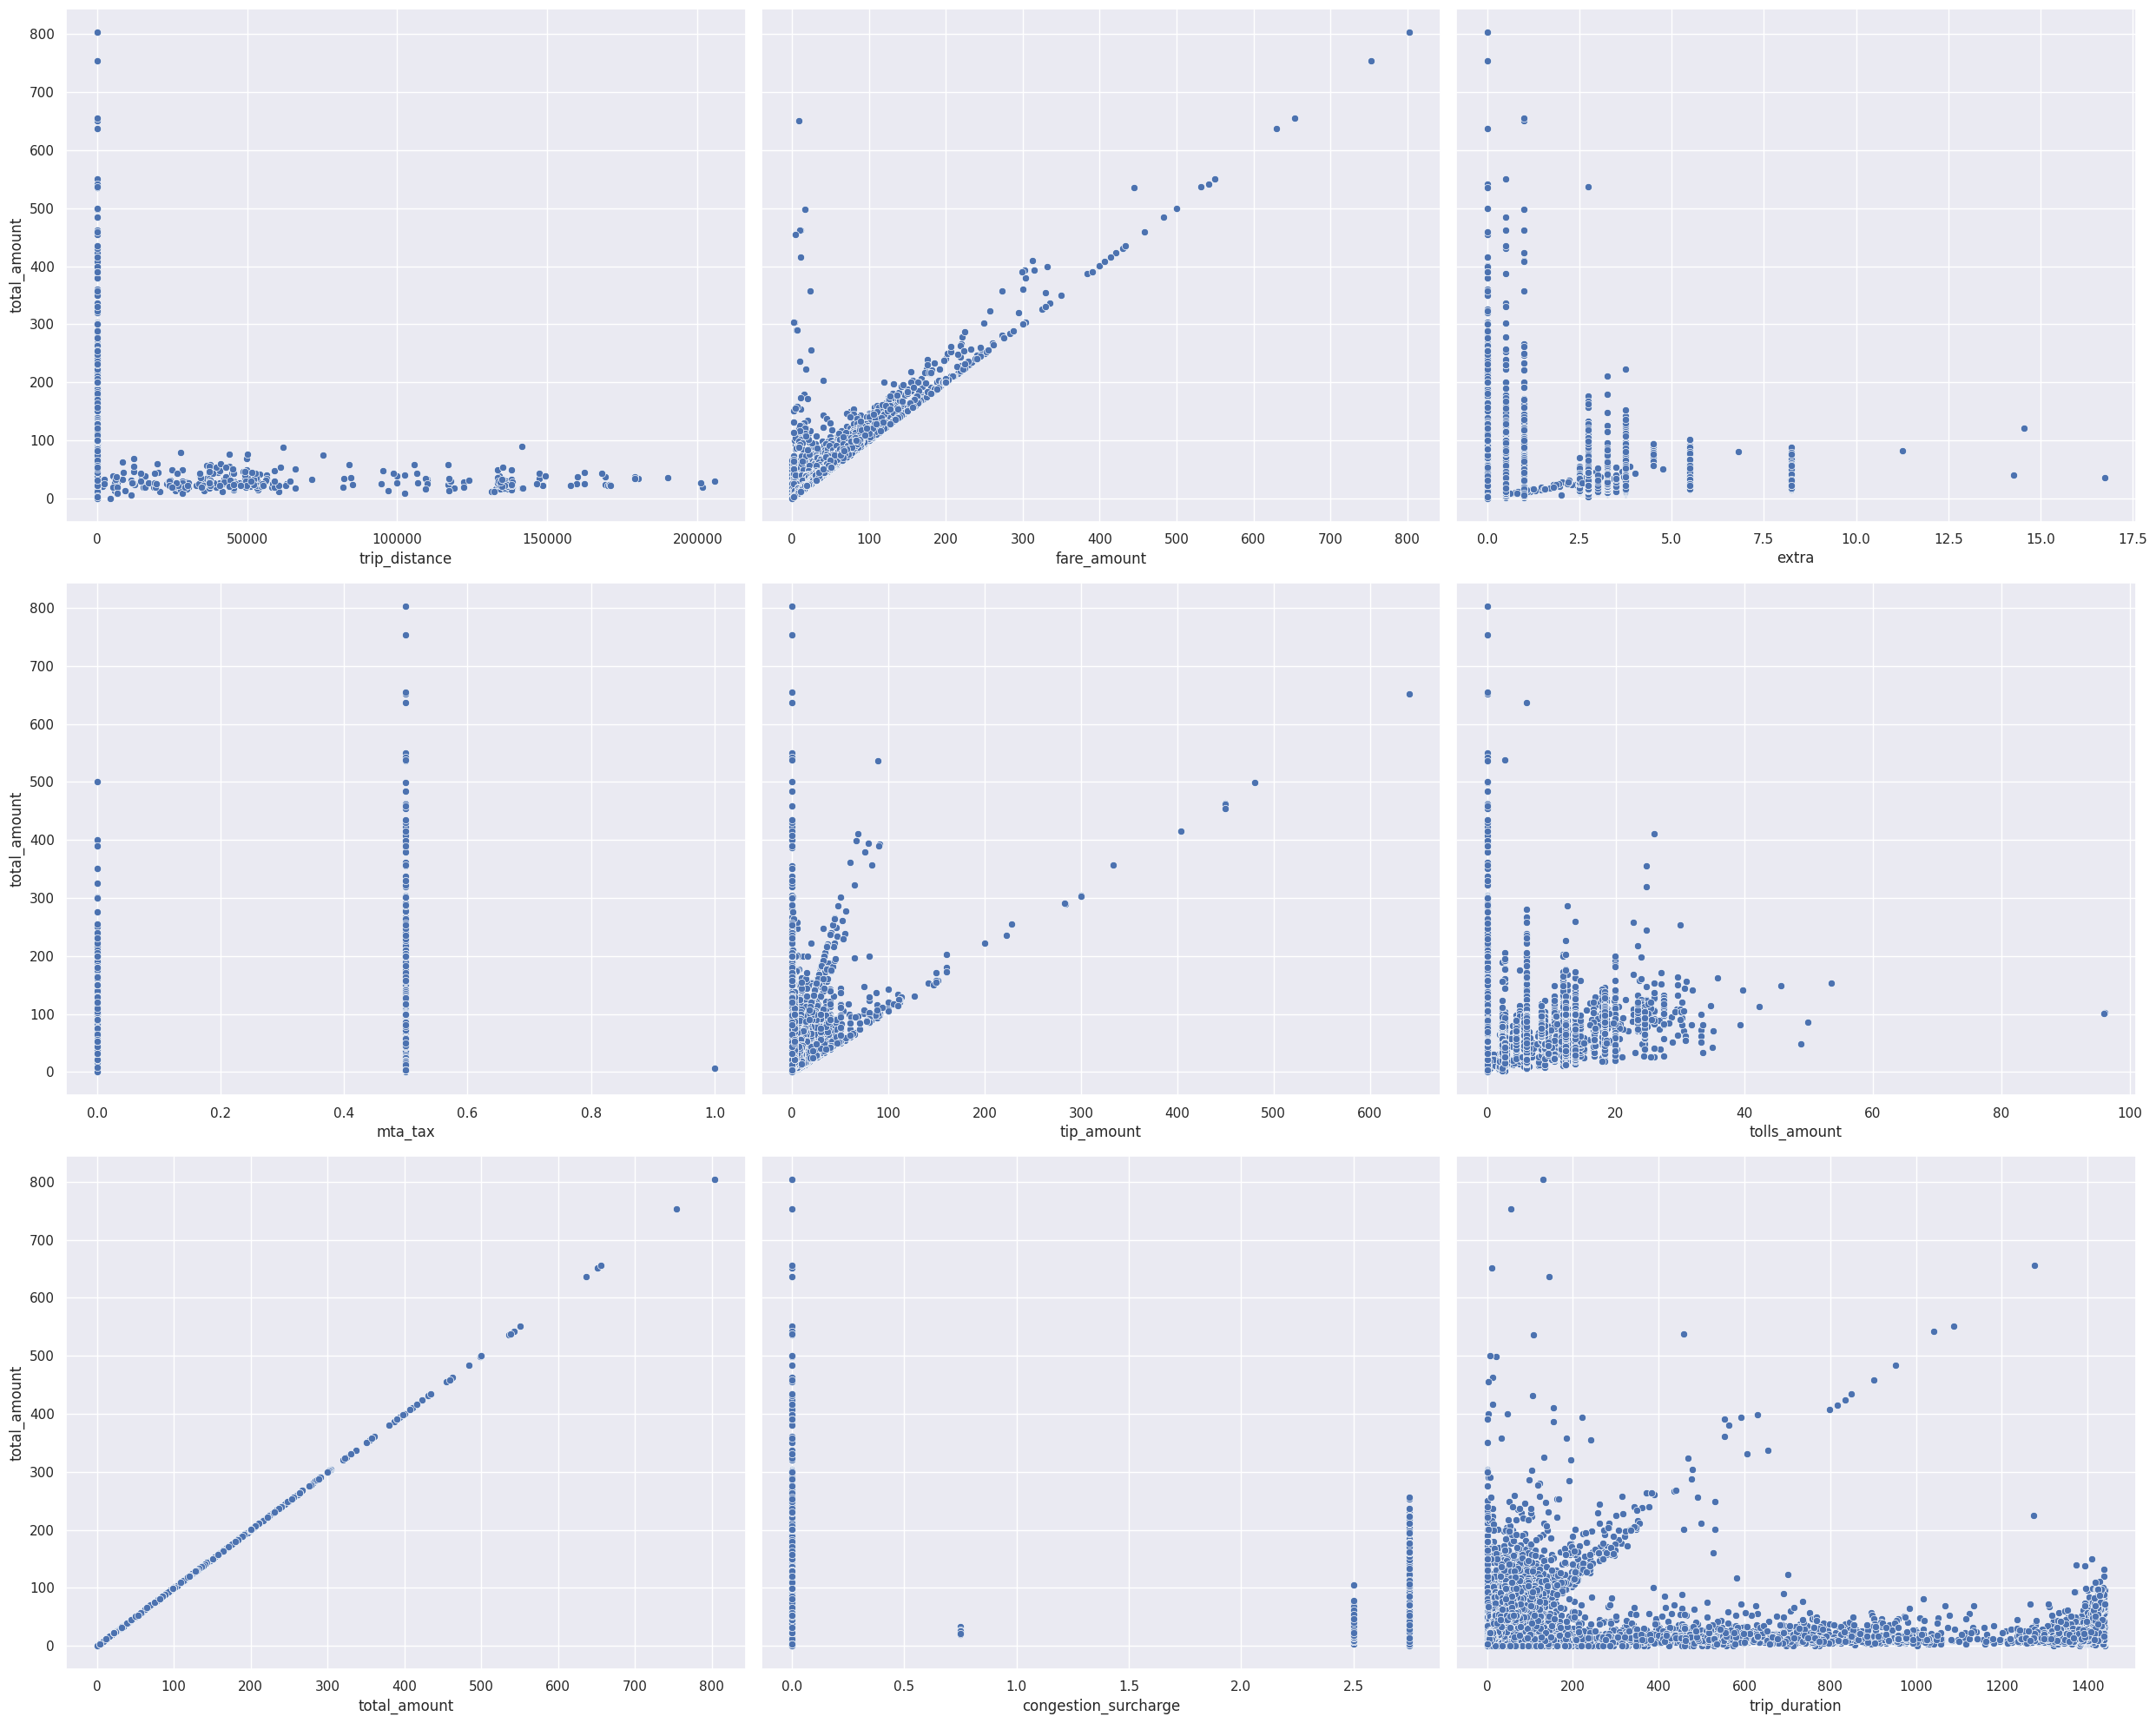

In [62]:
x=con_col
data=df_step4
y="total_amount"
f,ax=plt.subplots(round(len(x)/3),3,figsize=(25,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(20,10)})
  p=sns.scatterplot(x=i,data=data,y=y,ax=a)
  # p.set_ylim(0,64.12)

  p.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_continuous_variable_with '+y+ ' .png')

In [63]:
#save each pic
def save_scatter(x,y,data):
  for i in x:
    sns.set(rc = {'figure.figsize':(15,10)})
    p=sns.scatterplot(x=i,data=data,y=y)

    # p.set_ylim(0,64.12)
    p.ticklabel_format(style='plain')
    plt.title("scatterplot between "+i+" vs "+y)
    fig=p.get_figure()
    plt.savefig(path+"picture/scatterplot between "+i+" vs "+y +" .png")
    plt.close()

In [64]:
save_scatter(x=con_col,y='total_amount',data=data)

### <h3> 4.2.3 Trực quan đa biến phân loại với tip_amount </h3>

In [65]:
np.histogram(df_step4.tip_amount)

(array([1728680,      70,       9,       3,       4,       1,       1,
              4,       0,       1]),
 array([  0.  ,  64.12, 128.24, 192.36, 256.48, 320.6 , 384.72, 448.84,
        512.96, 577.08, 641.2 ]))

Vùng giá trị của tip_amount chỉ tập trung chủ yếu tại  0 - 64.12 nên sẽ lấy khoảng này để trực quan

In [66]:
cat_col_b=['PU_Borough','DO_Borough','PU_service_zone','DO_service_zone','pickup_month','dropoff_month','pickup_weekday','dropoff_weekday',
       'pickup_hour','dropoff_hour','pickup_bin_hours', 'dropoff_bin_hours']

In [67]:
cat_col_a = [col for col in cat_col if col not in ('DOLocationID','PULocationID','pickup_month',
 'pickup_weekday',
 'pickup_hour',
 'dropoff_month',
 'dropoff_weekday',
 'dropoff_hour')]

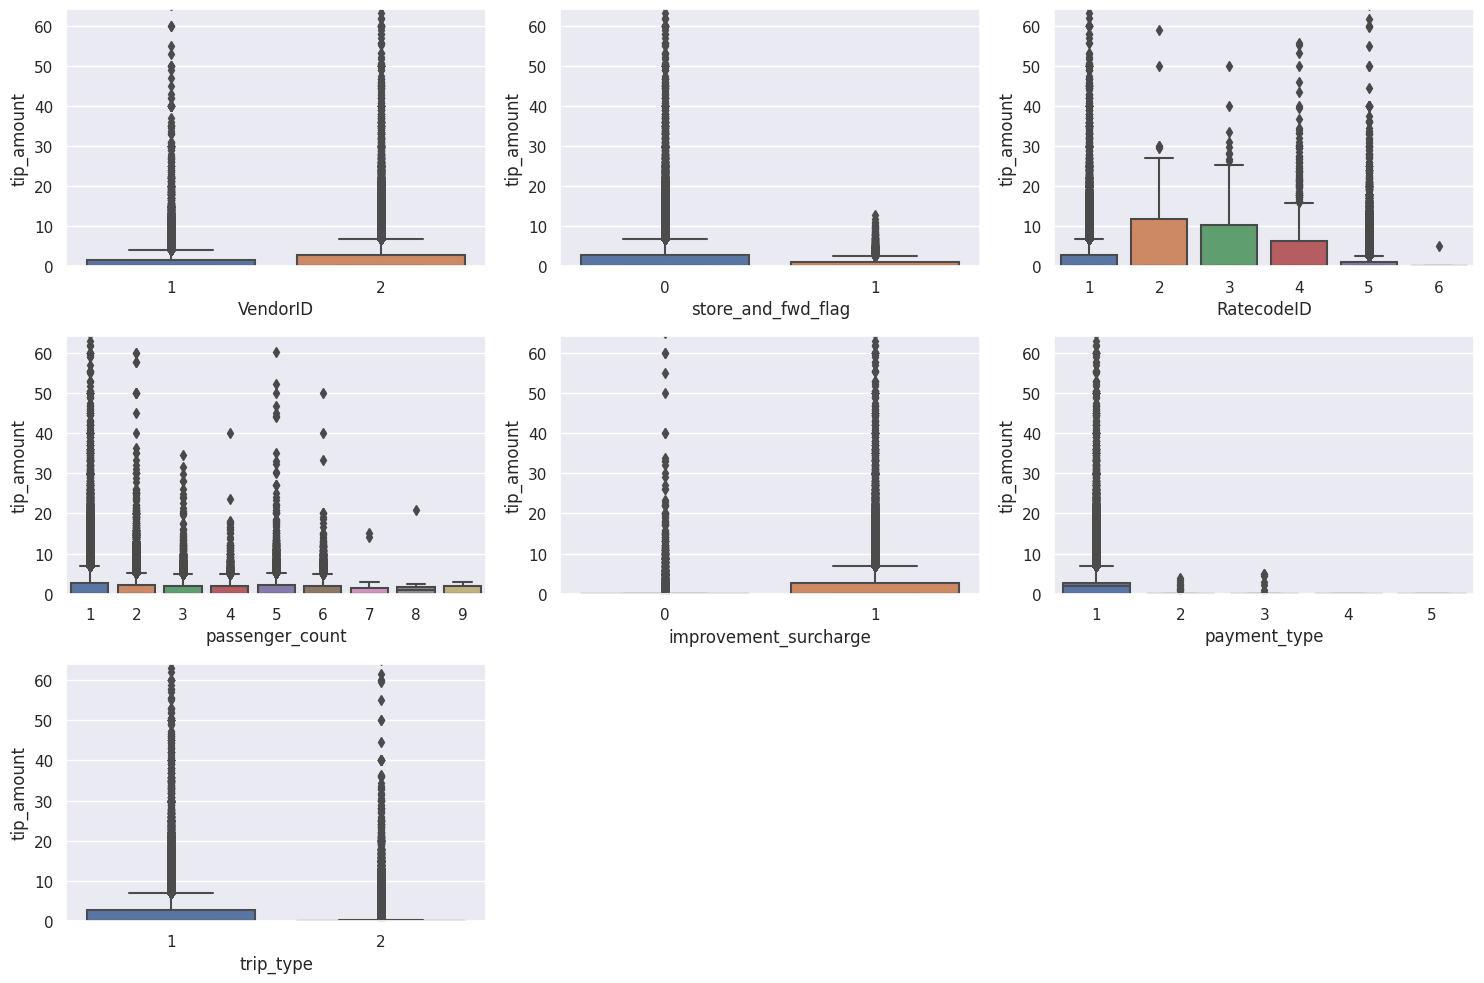

In [68]:
x=cat_col_a
data=df_step4
y="tip_amount"
f=plt.figure(figsize=(15,10))
for i,col in enumerate(x):
  ax=f.add_subplot(331+i)
  sns.set(rc = {'figure.figsize':(8,8)})
  sns.boxplot(x=col,data=data,y=y)
  ax.set_ylim(0,64.12)

plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_categorical_variable_with_'+y+' .png')

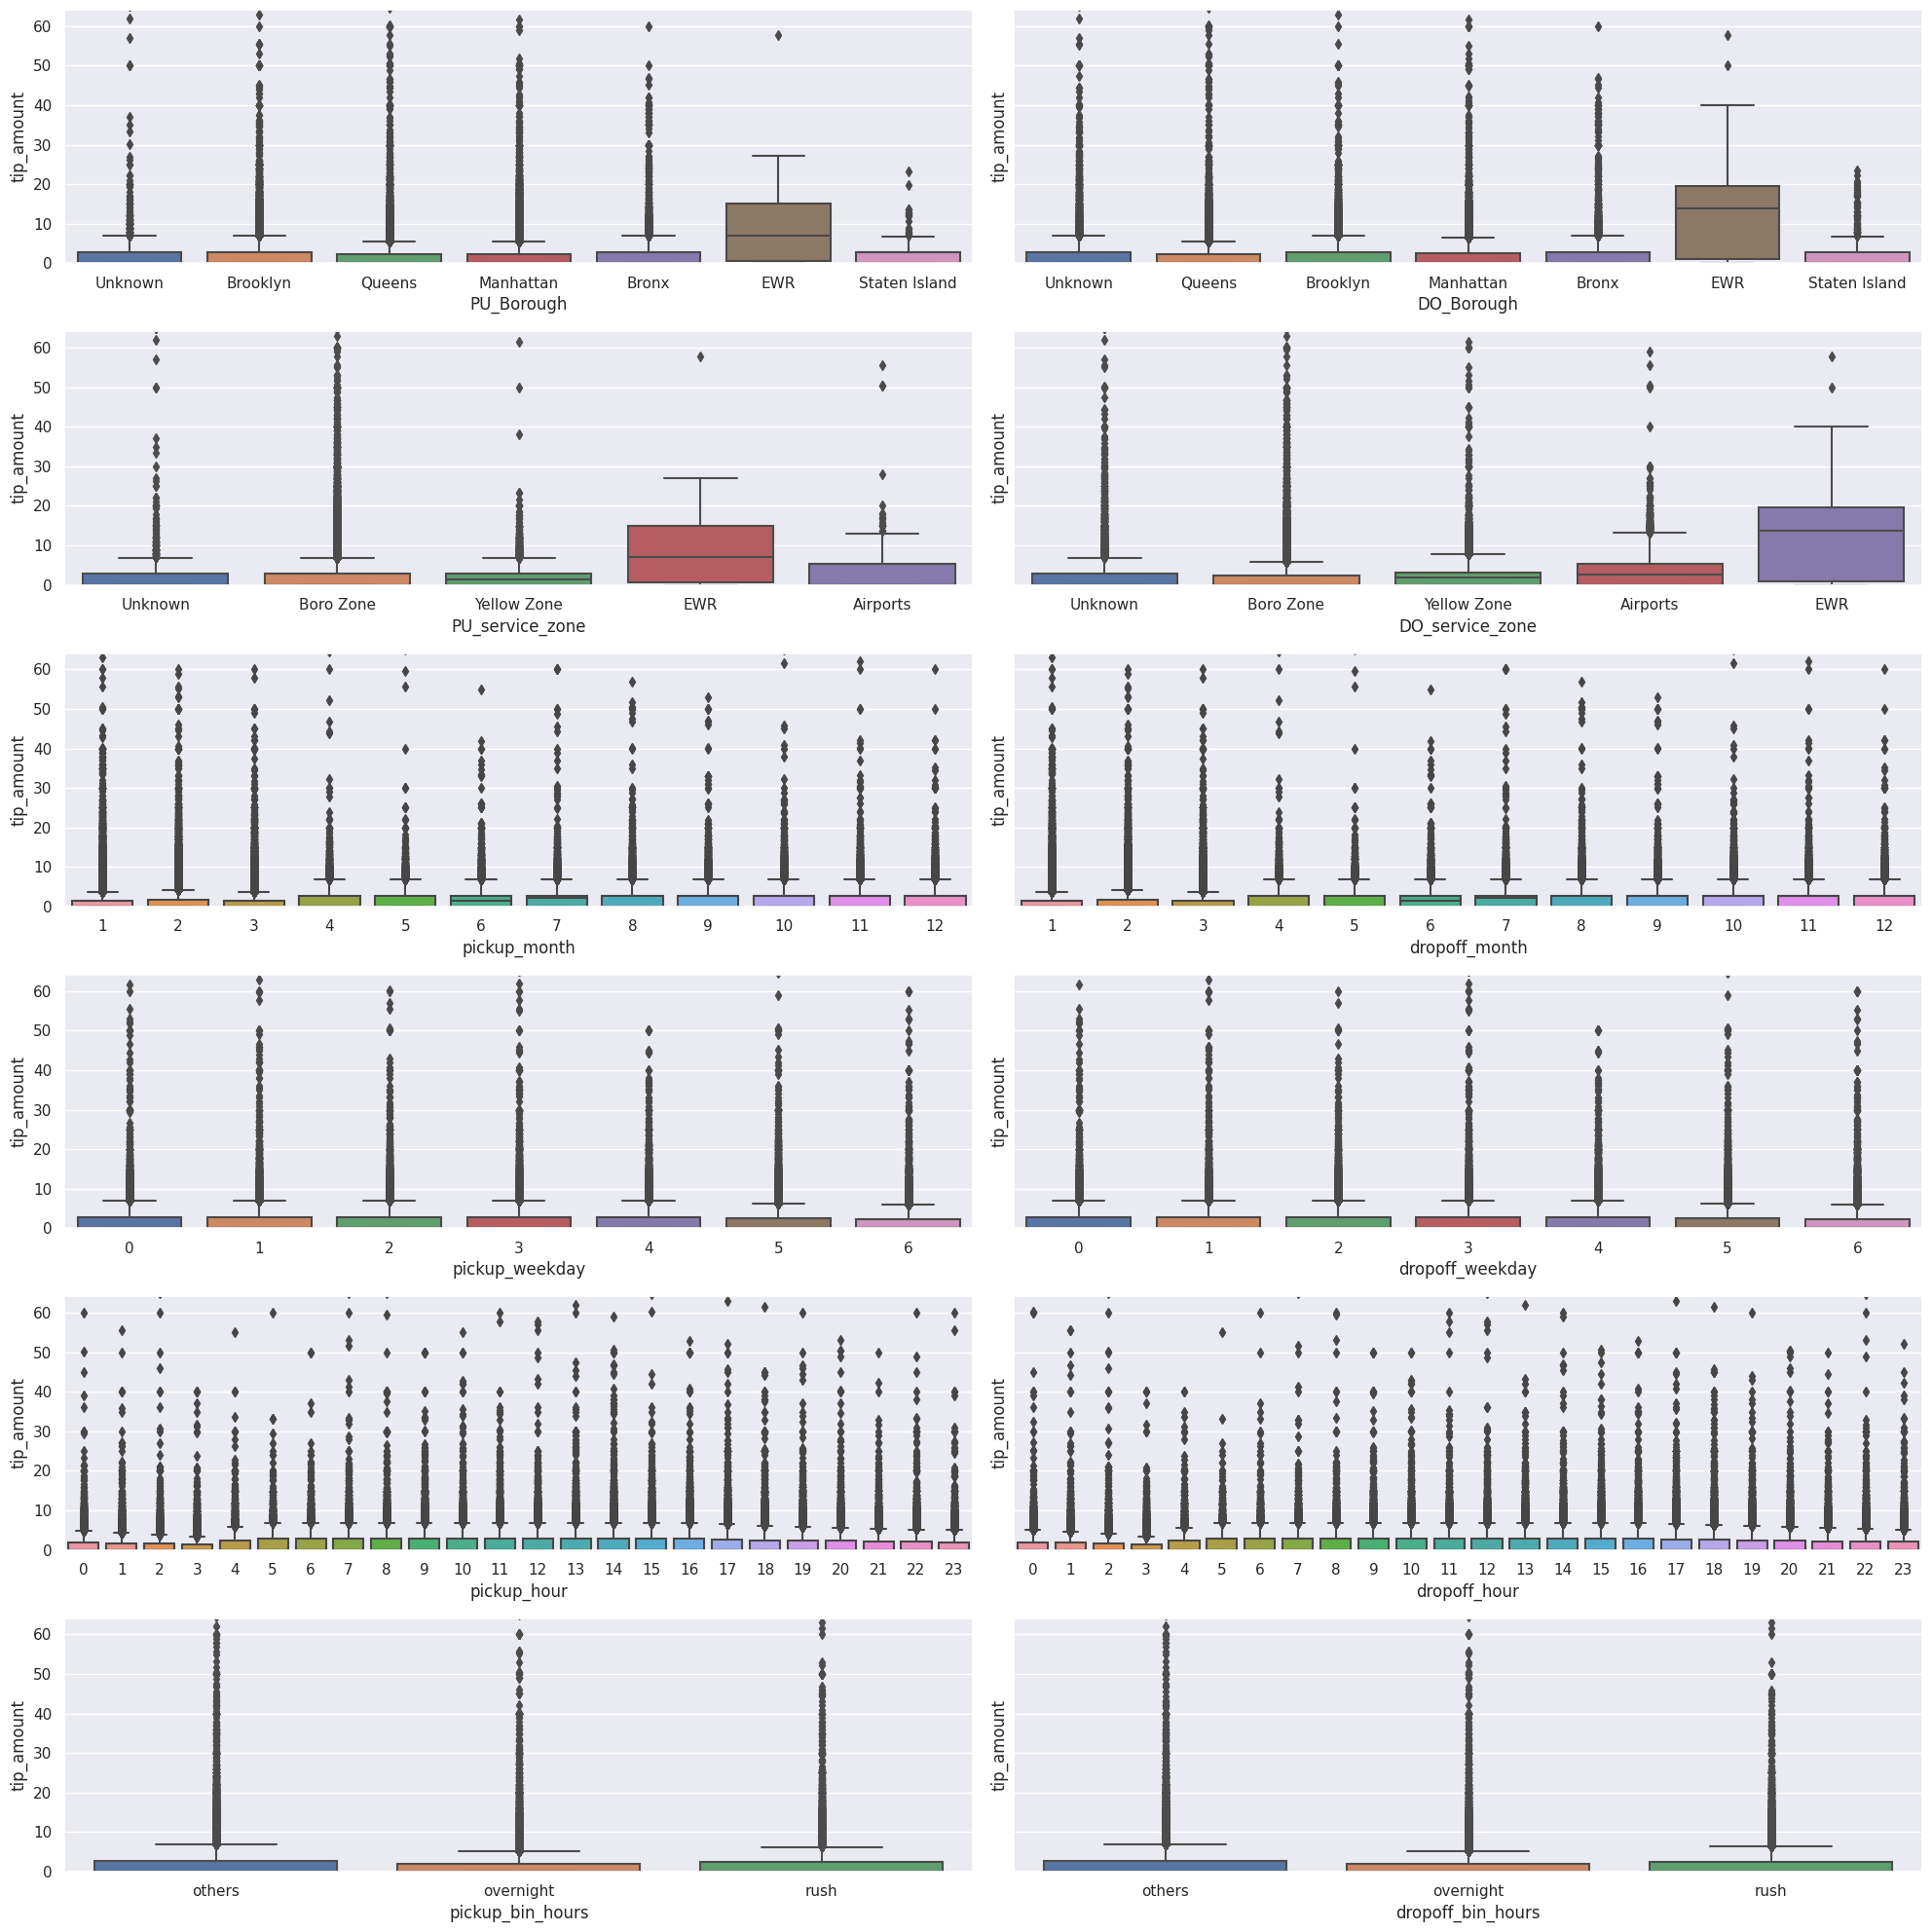

In [69]:
x=cat_col_b
data=df_step4
y="tip_amount"
f,ax=plt.subplots(round(len(x)/2),2,figsize=(20,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(10,10)})
  p=sns.boxplot(x=i,data=data,y=y,ax=a)
  p.set_ylim(0,64.12)

plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_dual_categorical_variable_with_'+y+' .png')

### 4.2.4. Visualize categorical variables with total_amount

In [70]:
np.histogram(df_step4.total_amount)


(array([1719686,    8809,     198,      36,      21,      11,       7,
              1,       2,       2]),
 array([  0.  ,  80.38, 160.76, 241.14, 321.52, 401.9 , 482.28, 562.66,
        643.04, 723.42, 803.8 ]))

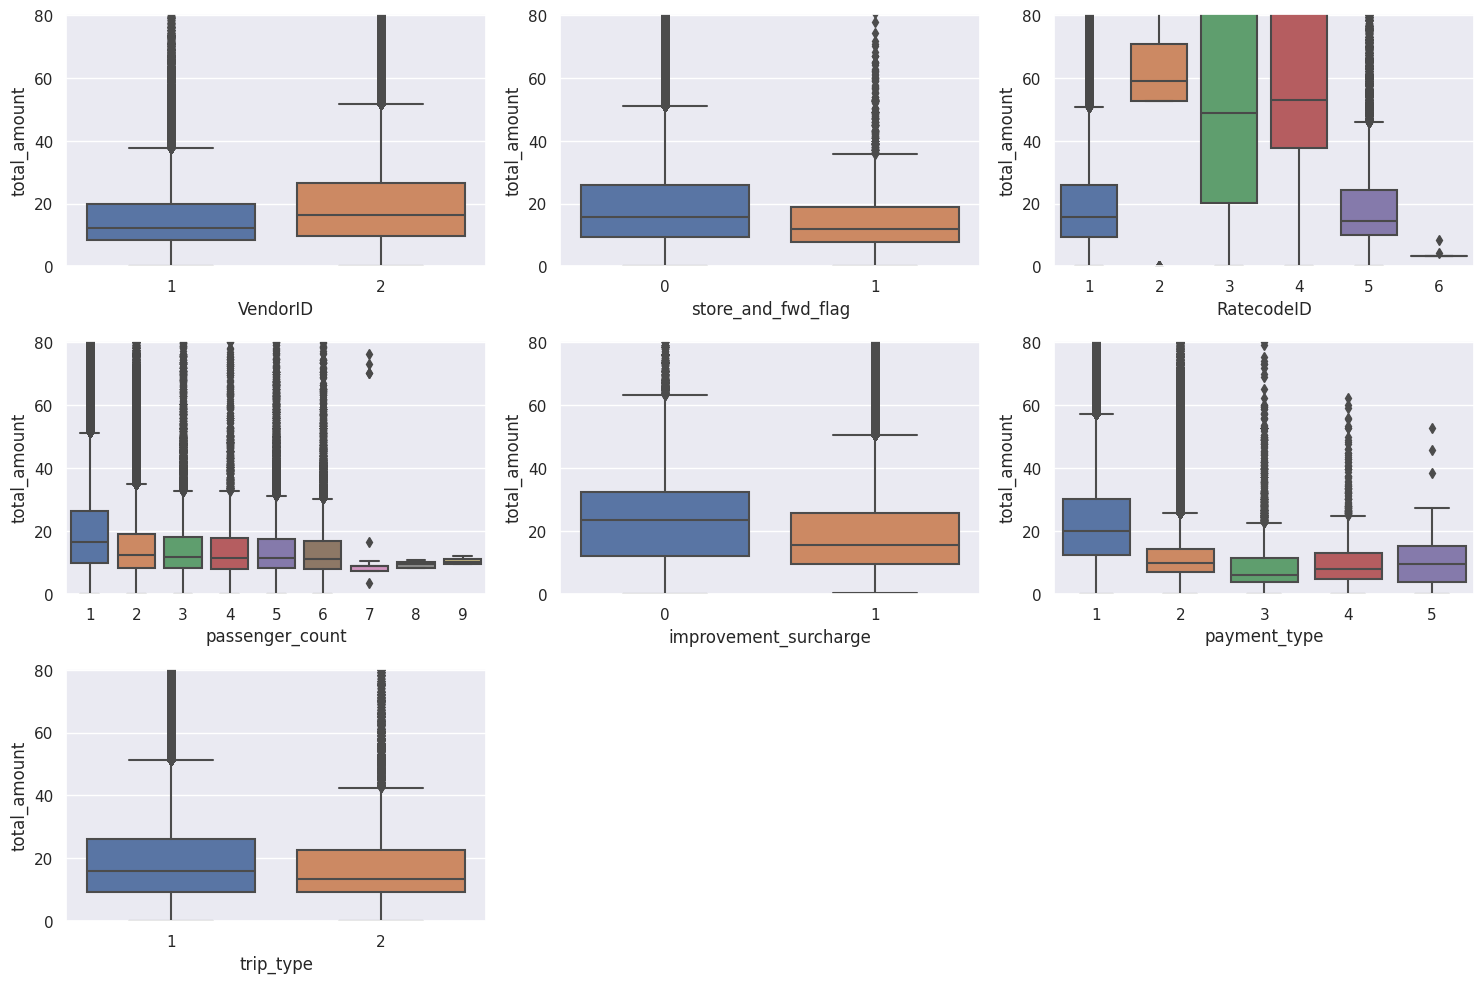

In [71]:
x=cat_col_a
data=df_step4
y="total_amount"
f=plt.figure(figsize=(15,10))
for i,col in enumerate(x):
  ax=f.add_subplot(331+i)
  sns.set(rc = {'figure.figsize':(8,8)})
  sns.boxplot(x=col,data=data,y=y)
  ax.set_ylim(0,80.38)

plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_categorical_variable_with_'+y+' .png')

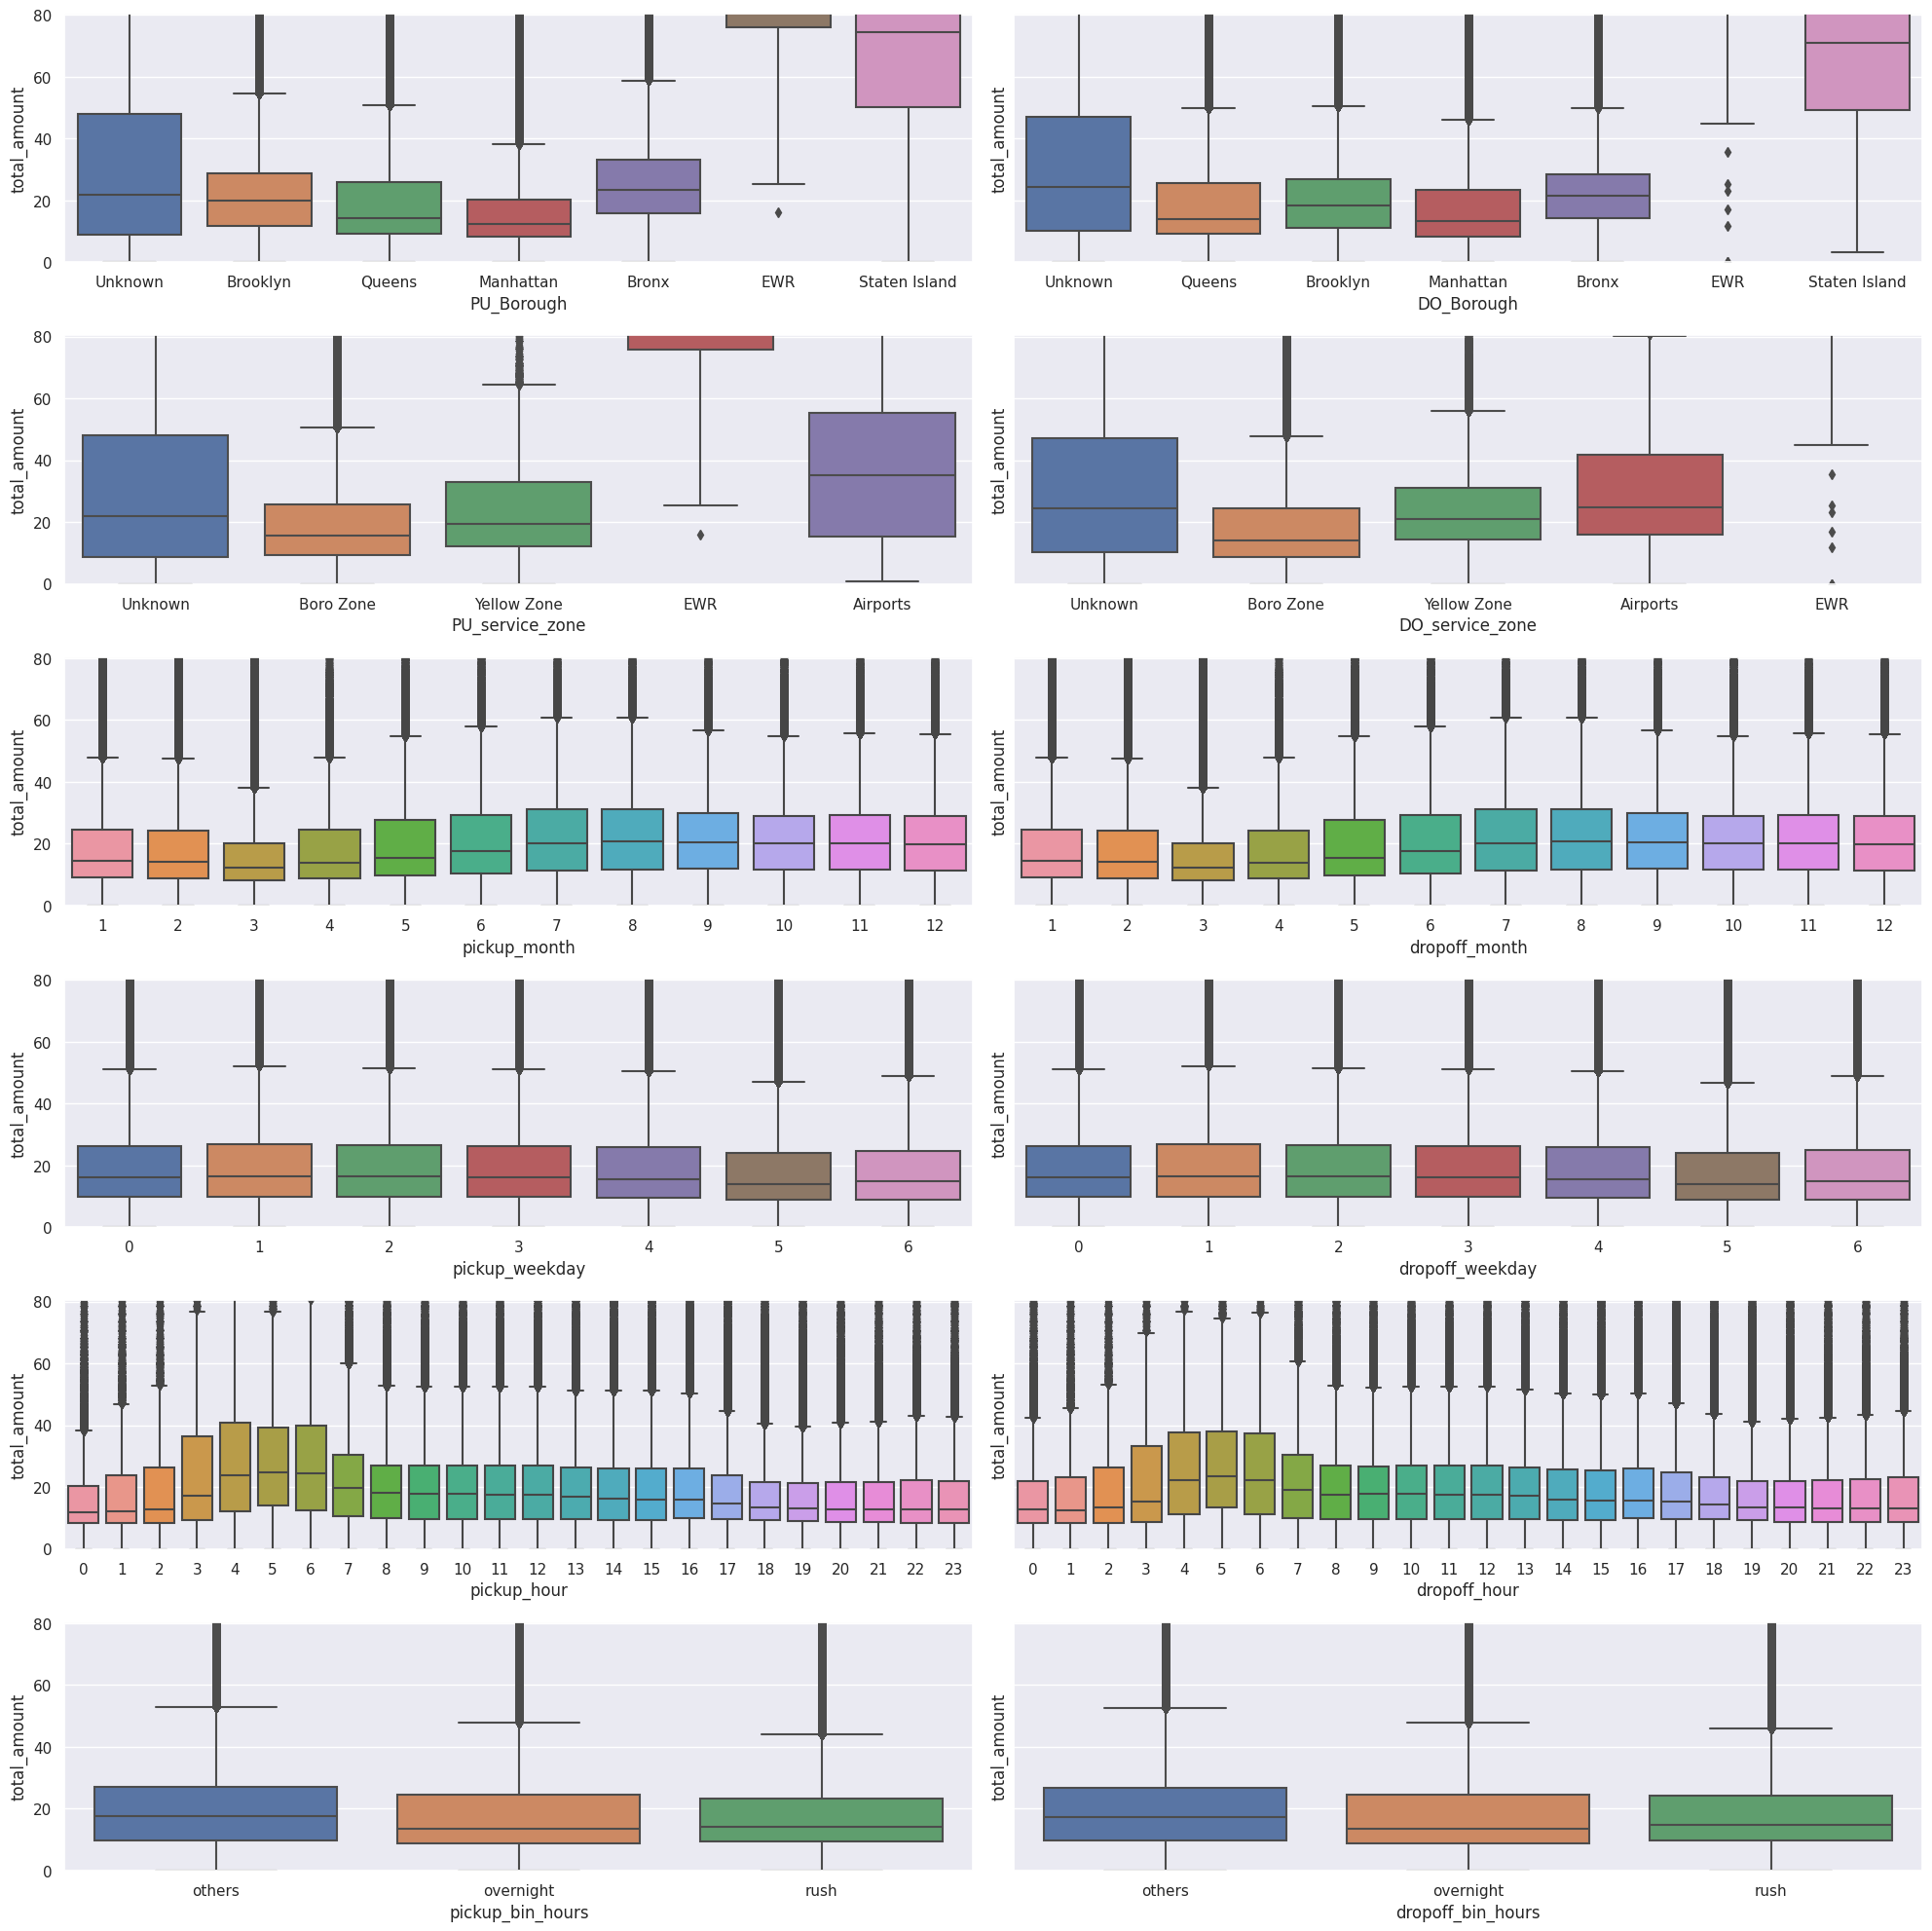

In [72]:
x=cat_col_b
data=df_step4
y="total_amount"
f,ax=plt.subplots(round(len(x)/2),2,figsize=(20,20),sharey=True)
for i,a in zip(x,ax.flat):
  sns.set(rc = {'figure.figsize':(10,10)})
  p=sns.boxplot(x=i,data=data,y=y,ax=a)
  p.set_ylim(0,80.38)

plt.tight_layout()
plt.show()
f.savefig(path+'picture/eda_dual_categorical_variable_with_'+y+' .png')

In [73]:
#save each boxplot
def save_boxplot(x,y,data,y_lim):
  for i in x:
    sns.set(rc = {'figure.figsize':(10,10)})
    p=sns.boxplot(x=i,data=data,y=y)
    p.set_ylim(y_lim)
    fig=p.get_figure()
    plt.savefig(path+"picture/boxplot between "+i+" vs "+y +" .png")
    plt.close()

In [74]:
# for i in cat_col_b:
#   sns.set(rc = {'figure.figsize':(10,10)})
#   p=sns.boxplot(x=i,data=data,y=y)
#   p.set_ylim(0,64.12)
#   fig=p.get_figure()
#   plt.savefig(path+"picture/boxplot between "+i+" vs "+y +" .png")
#   plt.close()

In [75]:
save_boxplot(x=cat_col_a,y="total_amount",data=df_step4,y_lim=(0,80.38))

In [76]:
save_boxplot(x=cat_col_b,y="total_amount",data=df_step4,y_lim=(0,80.38))

### 4.2.5 Ảnh hưởng của các biến thời gian tới tip_amount

In [77]:
def lineplot(x1,x2,y,data):
  ax=sns.lineplot(x=x1,y=y,data=data,errorbar=None,marker="o",label=x1,dashes=False,color="red")
  ax1=sns.lineplot(x=x2,y=y,data=data,errorbar=None,label=x2,ax=ax,marker="o",dashes=False,color="green")
  plt.xlabel(x1.split("_")[1])
  plt.title("Lineplot of "+x1+", "+x2+" and "+y)
  plt.legend()
  plt.show()
  f=ax.get_figure()
  f.savefig(path+"picture/Lineplot of "+x1+", "+x2+" and "+y+" .png")


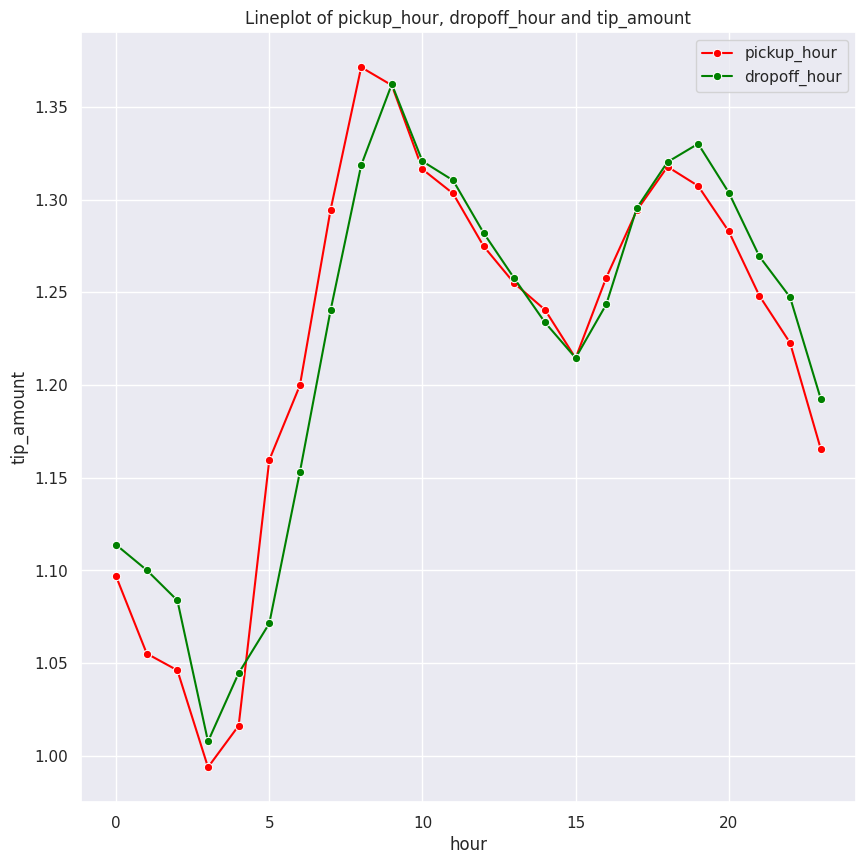

In [78]:
lineplot(x1="pickup_hour",x2="dropoff_hour",y="tip_amount",data=df_step4)

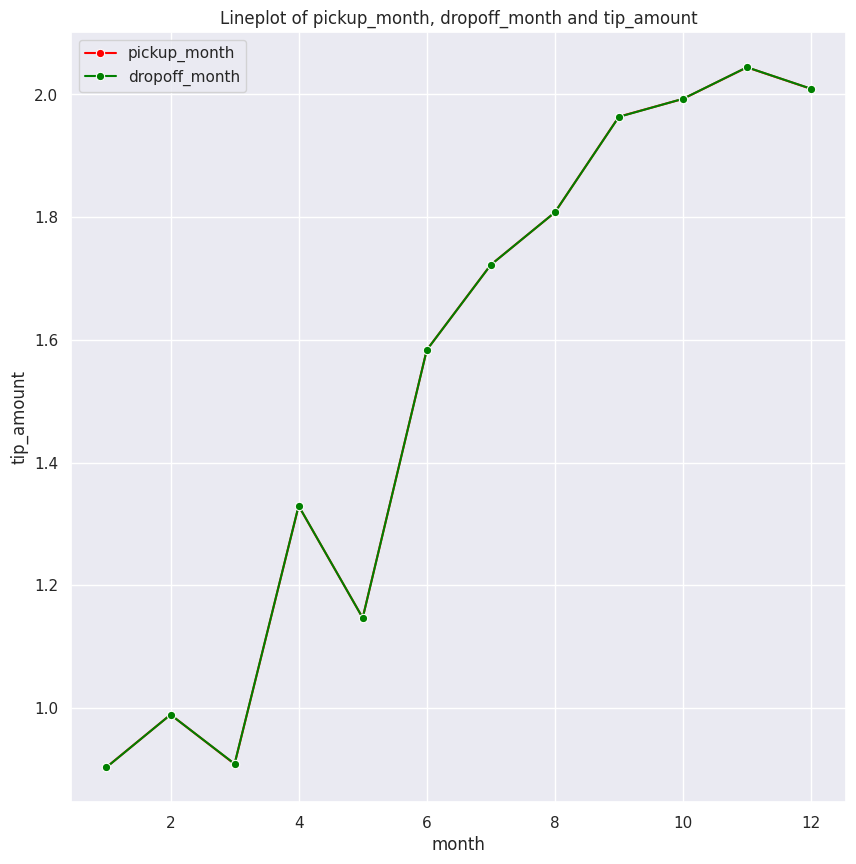

In [79]:
lineplot(x1="pickup_month",x2="dropoff_month",y="tip_amount",data=df_step4)

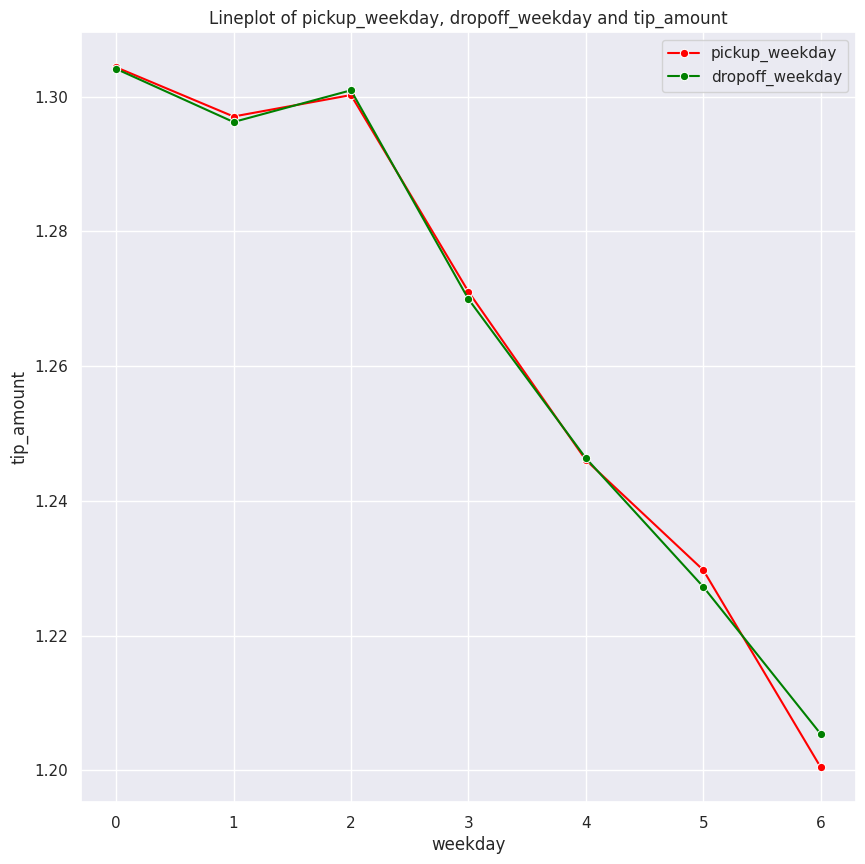

In [80]:
lineplot(x1="pickup_weekday",x2="dropoff_weekday",y="tip_amount",data=df_step4)

### 4.2.6 Visualize time variables with total_amount

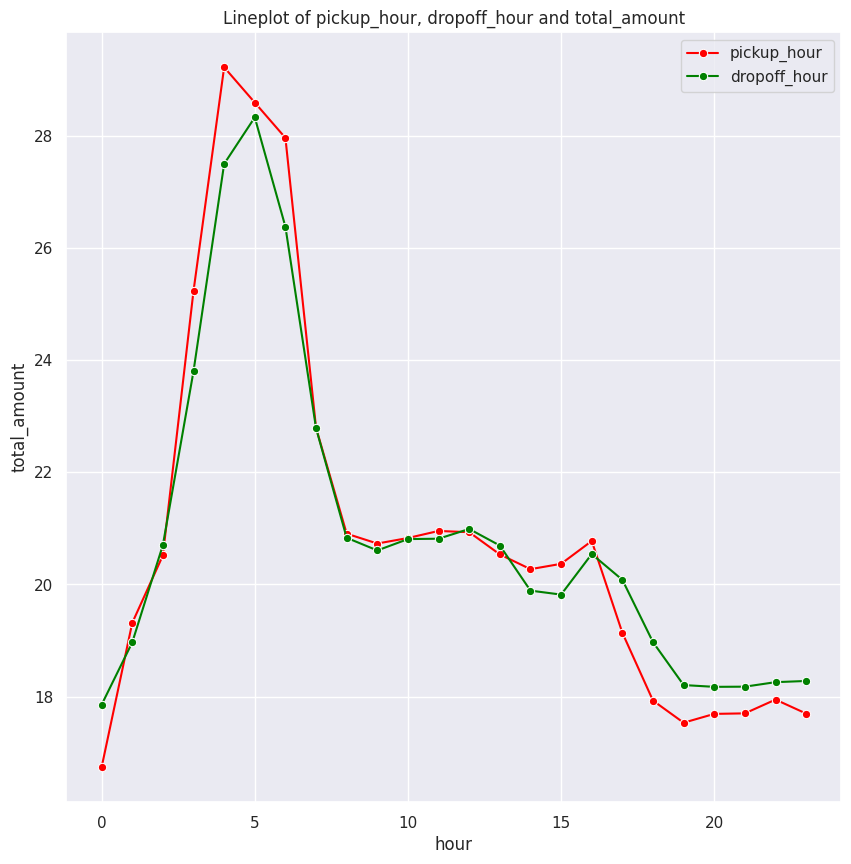

In [81]:
lineplot(x1="pickup_hour",x2="dropoff_hour",y="total_amount",data=df_step4)

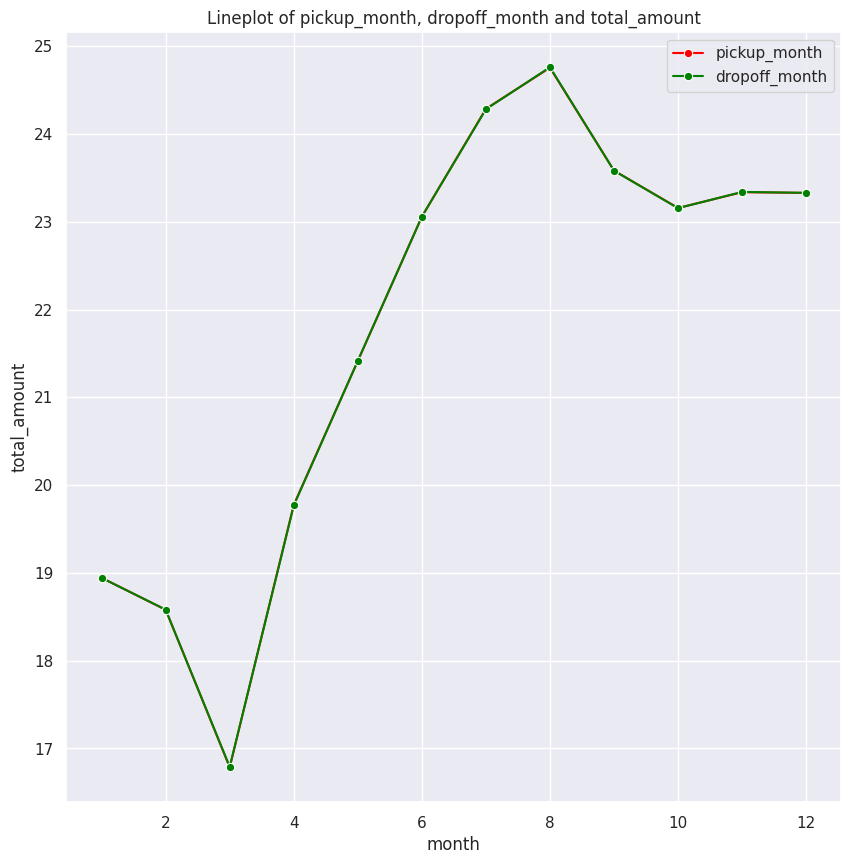

In [82]:
lineplot(x1="pickup_month",x2="dropoff_month",y="total_amount",data=df_step4)

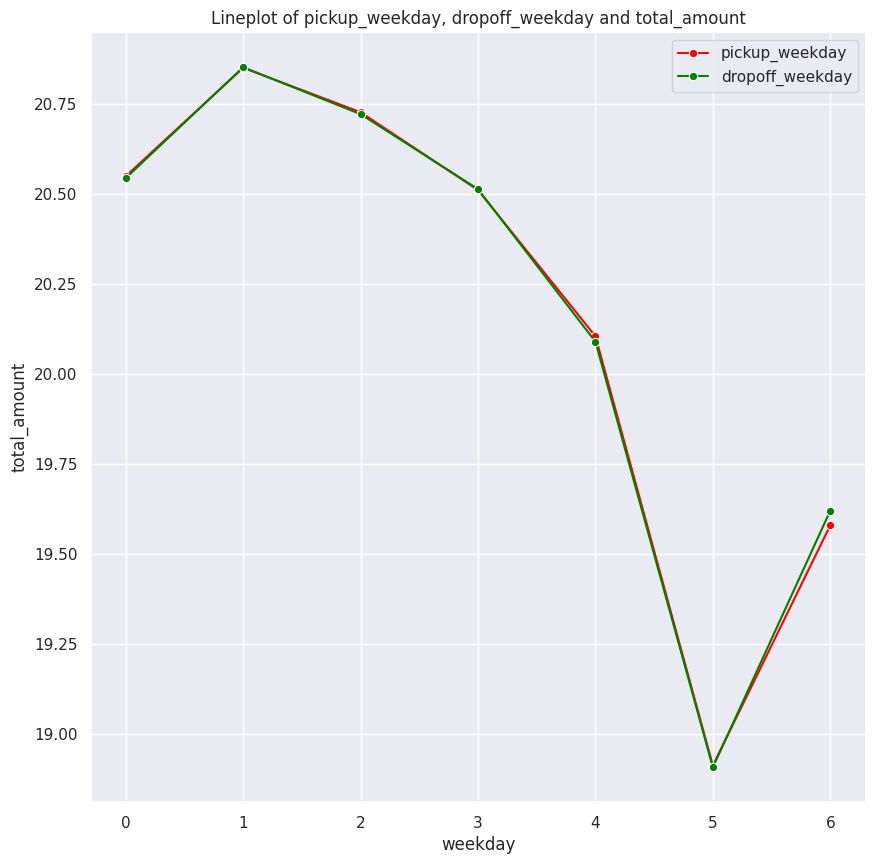

In [83]:
lineplot(x1="pickup_weekday",x2="dropoff_weekday",y="total_amount",data=df_step4)

### 4.2.7 Comparison between tip_amount and total_amount with time variables

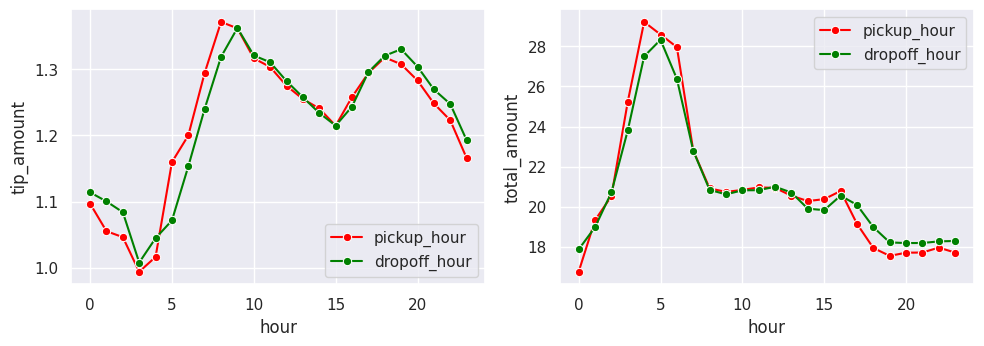

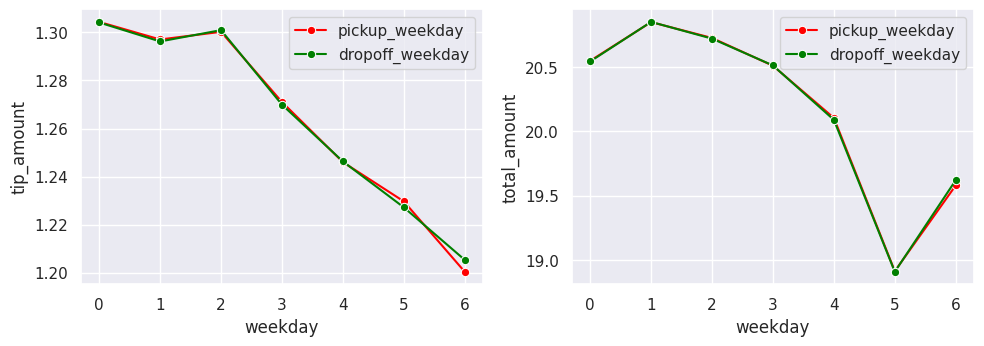

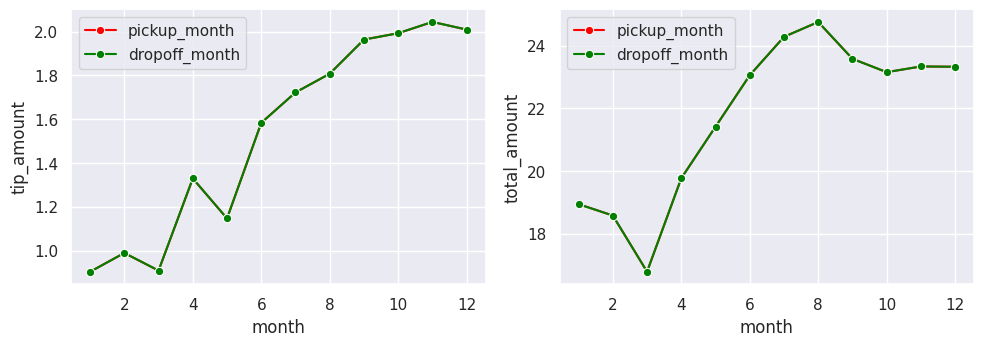

In [84]:
#compare tip_amount and total mount
x=[["pickup_hour","dropoff_hour"],["pickup_weekday","dropoff_weekday"],["pickup_month","dropoff_month"]]
y=["tip_amount","total_amount"]
data=df_step4
for col in x:
  x1=col[0]
  x2=col[1]
  f=plt.figure(figsize=(10,10))

  for i,amount in enumerate(y):

    ax=f.add_subplot(321+i)
    sns.set(rc = {'figure.figsize':(5,5)})
    ax0=sns.lineplot(x=x1,y=amount,data=data,errorbar=None,marker="o",label=x1,dashes=False,color="red",ax=ax)
    ax1=sns.lineplot(x=x2,y=amount,data=data,errorbar=None,label=x2,ax=ax0,marker="o",dashes=False,color="green")
    ax0.set(xlabel=x1.split("_")[1])

  plt.legend()
  plt.tight_layout()
  plt.show()
  f.savefig(path+'picture/eda_dual_time_variable_with_'+amount+' .png')


In [85]:
df_step4.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PU_Borough',
       'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone',
       'DO_service_zone', 'trip_duration', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour',
       'pickup_bin_hours', 'dropoff_bin_hours'],
      dtype='object')

In [86]:
def sumbar(do,pu,y,data,top=None):
  do_df=data.groupby(do, as_index=False) \
                    .agg({y:'sum'})
  pu_df=data.groupby(pu, as_index=False) \
                      .agg({y:'sum'})
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8),sharey=True)
  if top==None:
    ax[0].set_title(str(pu) + " with most "+str(y))
    ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')

    sns.barplot(x=pu,y=y,data=pu_df,ax=ax[0])

    sns.barplot(x=do,y=y,data=do_df,ax=ax[1])
    ax[1].set_title(str(do)+" with most " +str(y))


    plt.tight_layout()
    fig.savefig(path+"picture/Barplot of "+ str(do.split("_",maxsplit=1)[1])+" with most "+str(y))
  else:
    putop= pu_df.sort_values(by=[y],ascending=False).set_index(pu).head(top)
    dotop= do_df.sort_values(by=[y],ascending=False).set_index(do).head(top)
    ax[0].set_title("Top " + str(top)+" "+ str(pu) + " with most "+str(y))
    ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')
    sns.barplot(x=putop.index,y=y,data=putop,ax=ax[0])

    sns.barplot(x=dotop.index,y=y,data=dotop,ax=ax[1])
    ax[1].set_title("Top " + str(top)+ " " +str(do)+" with most " +str(y))
    plt.tight_layout()
    fig.savefig(path+"picture/Barplot of "+ "Top "+ str(top)+" "+str(do.split("_",maxsplit=1)[1])+" with most "+str(y))



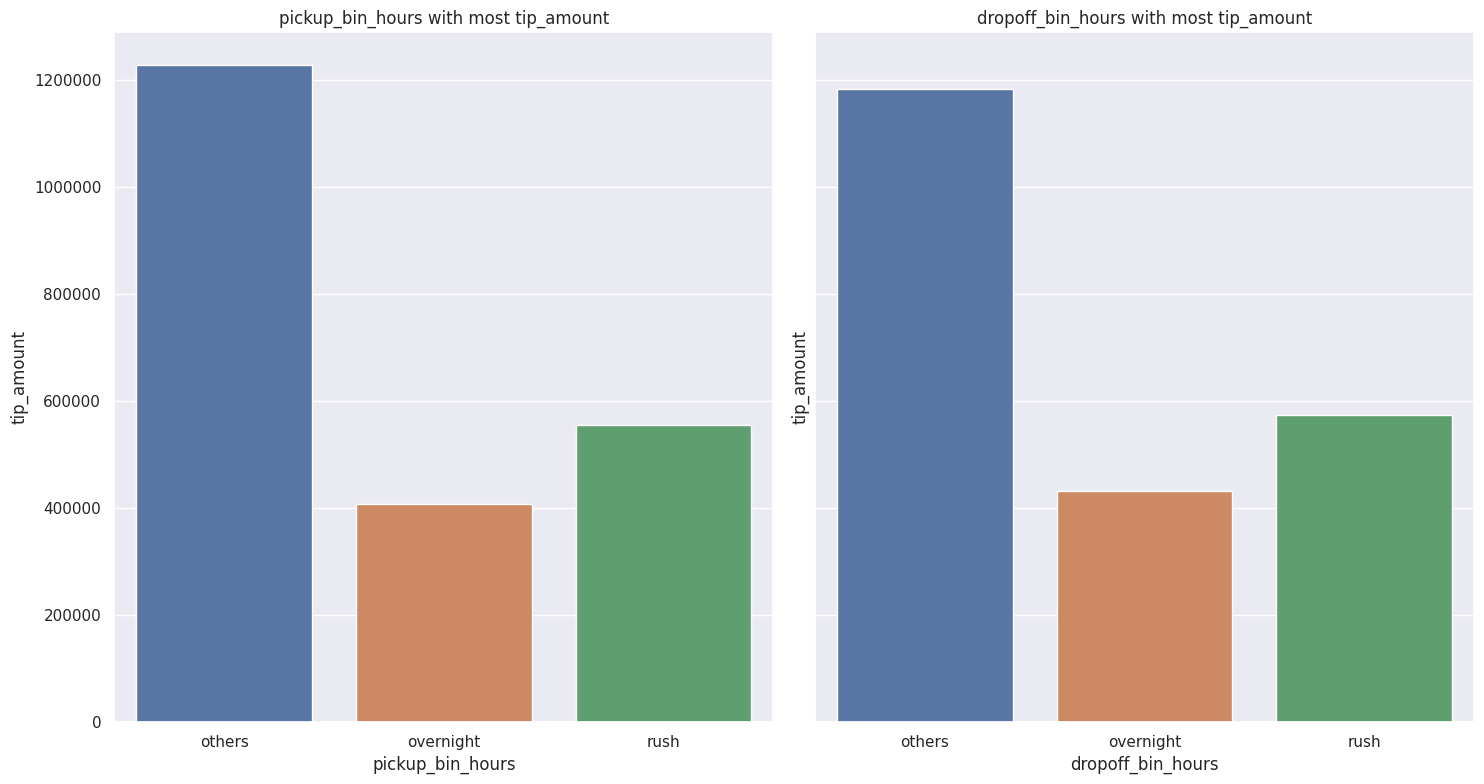

In [87]:
sumbar(pu="pickup_bin_hours",do="dropoff_bin_hours",data=df_step4,y="tip_amount")

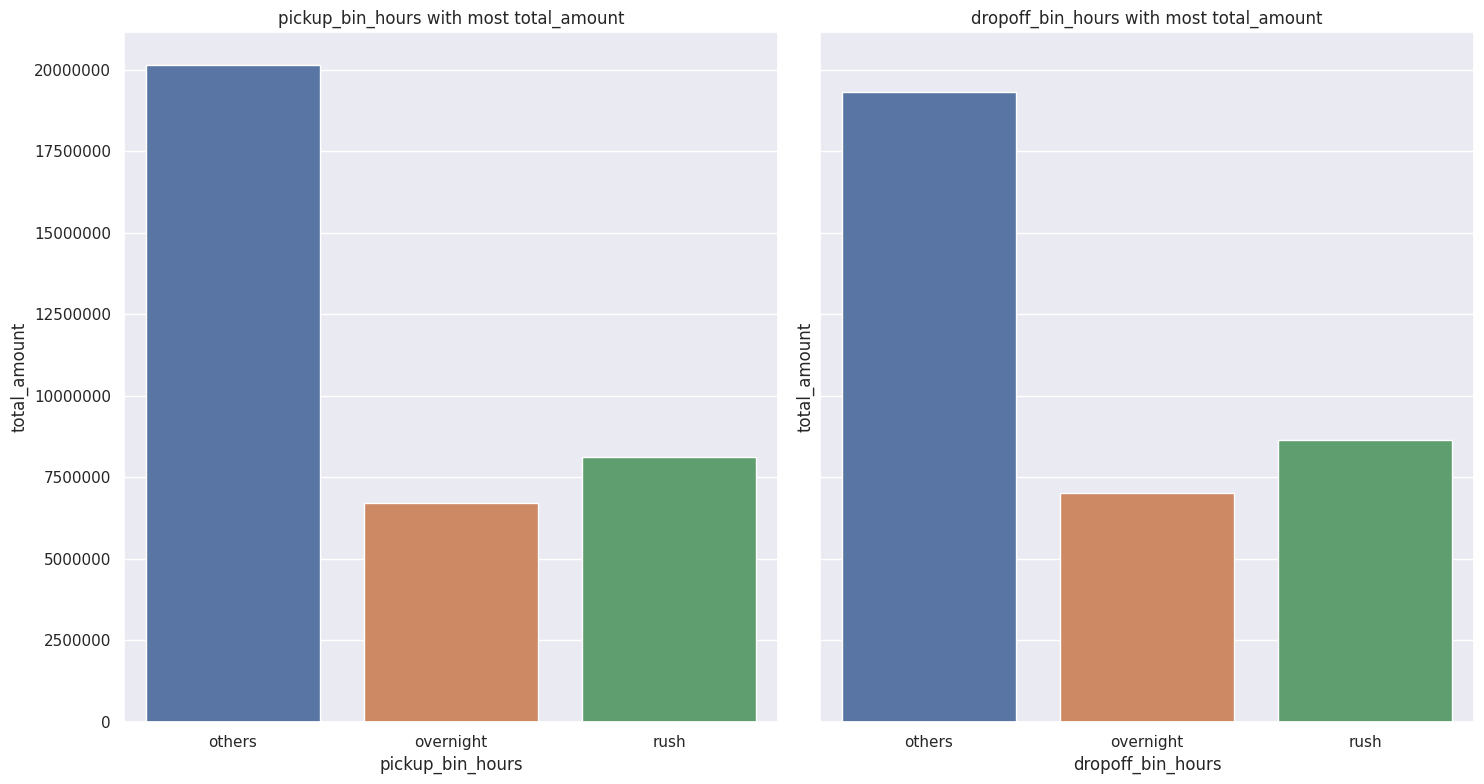

In [88]:
sumbar(pu="pickup_bin_hours",do="dropoff_bin_hours",data=df_step4,y="total_amount",top=None)

### 4.2.8 Ảnh hưởng của các biến địa lý tới tip_amount

In [89]:
df_tip_do = df_step4.groupby(["DO_Borough"], as_index=False) \
                    .agg({'tip_amount':'sum'}) \

df_tip_do

,DO_Borough,tip_amount
0,Bronx,214496.76
1,Brooklyn,550310.71
2,EWR,4373.59
3,Manhattan,953731.73
4,Queens,440493.33
5,Staten Island,3635.35
6,Unknown,23542.04


In [90]:
df_tip_pu = df_step4.groupby(["PU_Borough"], as_index=False) \
                    .agg({'tip_amount':'sum'}) \

df_tip_pu

,PU_Borough,tip_amount
0,Bronx,216142.11
1,Brooklyn,692396.38
2,EWR,270.82
3,Manhattan,819478.01
4,Queens,452449.72
5,Staten Island,2839.09
6,Unknown,7007.38


In [91]:
# PUtip = dict(zip(df_tip_pu['PU_Borough'].tolist(), df_tip_pu['tip_amount'].tolist()))
# DOtip = dict(zip(df_tip_do['DO_Borough'].tolist(), df_tip_do['tip_amount'].tolist()))

In [92]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
# ax = plt.subplot(1, 2, 1)
# ax.set_title("Pickup Boroughs with most tip")
# draw_region_map(ax, sf, heat = PUtip)
# ax = plt.subplot(1, 2, 2)
# ax.set_title("Dropoff Boroughs with most tip")
# draw_region_map(ax, sf, heat = DOtip)
# fig.savefig(path+"picture/Boroughs with most tip")

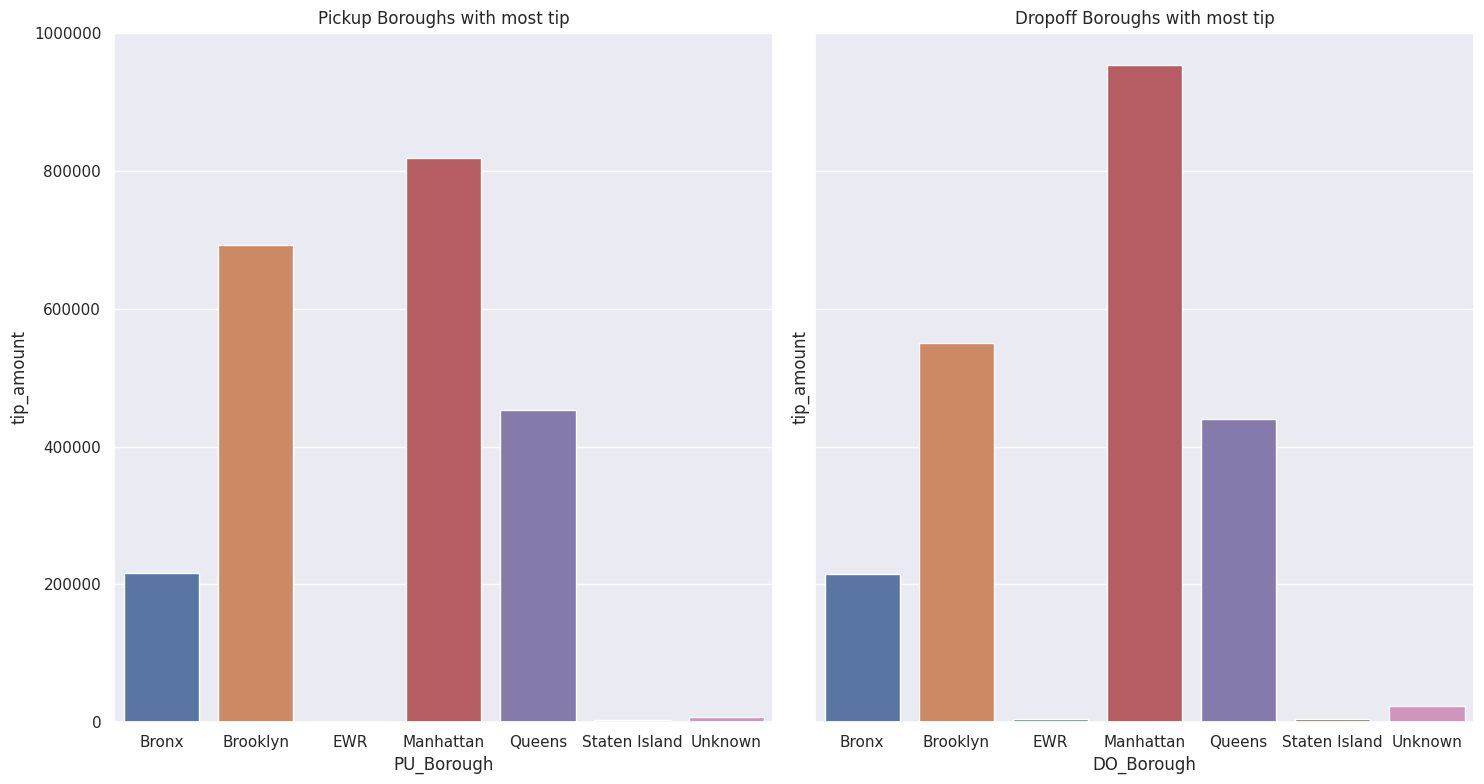

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8),sharey=True)
ax[0].set_title("Pickup Boroughs with most tip")
ax[0].ticklabel_format(useOffset=False, style='plain', axis='y')

sns.barplot(x="PU_Borough",y="tip_amount",data=df_tip_pu,ax=ax[0])

sns.barplot(x="DO_Borough",y="tip_amount",data=df_tip_do,ax=ax[1])
ax[1].set_title("Dropoff Boroughs with most tip")

plt.tight_layout()
fig.savefig(path+"picture/Barplot of Boroughs with most tip")

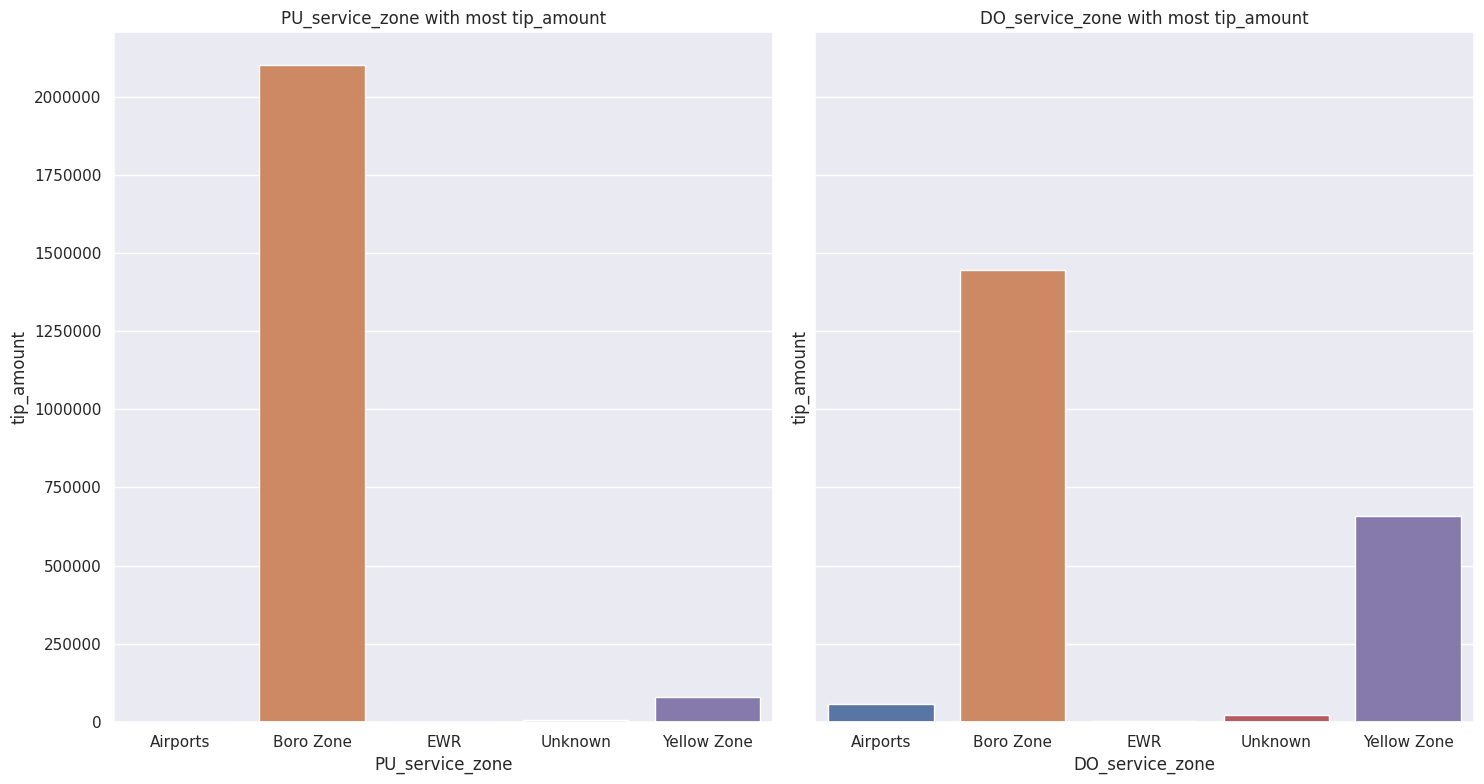

In [94]:
sumbar(pu="PU_service_zone",do="DO_service_zone",data=df_step4,y="tip_amount")

In [95]:
df_step4.columns


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PU_Borough',
       'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone',
       'DO_service_zone', 'trip_duration', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour',
       'pickup_bin_hours', 'dropoff_bin_hours'],
      dtype='object')

In [96]:
zone_tip_do = df_step4.groupby(["DOLocationID"], as_index=False) \
                    .agg({'tip_amount':'sum'})

In [97]:
zone_tip_pu = df_step4.groupby(["PULocationID"], as_index=False) \
                    .agg({'tip_amount':'sum'})

In [98]:
PUcount = dict(zip(zone_tip_pu['PULocationID'].tolist(), zone_tip_pu['tip_amount'].tolist()))
PUtop3 = zone_tip_pu.sort_values(by=['tip_amount'], ascending=False).set_index("PULocationID").head(3)
DOcount = dict(zip(zone_tip_do['DOLocationID'].tolist(), zone_tip_do['tip_amount'].tolist()))
DOtop3 = zone_tip_do.sort_values(by=['tip_amount'], ascending=False).set_index("DOLocationID").head(3)

In [99]:
df_step4.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PU_Borough',
       'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone',
       'DO_service_zone', 'trip_duration', 'pickup_month', 'pickup_weekday',
       'pickup_hour', 'dropoff_month', 'dropoff_weekday', 'dropoff_hour',
       'pickup_bin_hours', 'dropoff_bin_hours'],
      dtype='object')

In [100]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
# ax = plt.subplot(1, 2, 1)
# ax.set_title("Pickup Zones with most tips")
# draw_zone_map(ax, sf, heat=PUcount, text=PUtop3.index.tolist())
# ax = plt.subplot(1, 2, 2)
# ax.set_title("Dropoff Zones with most tips")
# draw_zone_map(ax, sf, heat=DOcount, text=DOtop3.index.tolist())
# f.savefig(path+"picture/Zones with most tips")

In [101]:
PUtop3.index

Int64Index([74, 75, 244], dtype='int64', name='PULocationID')

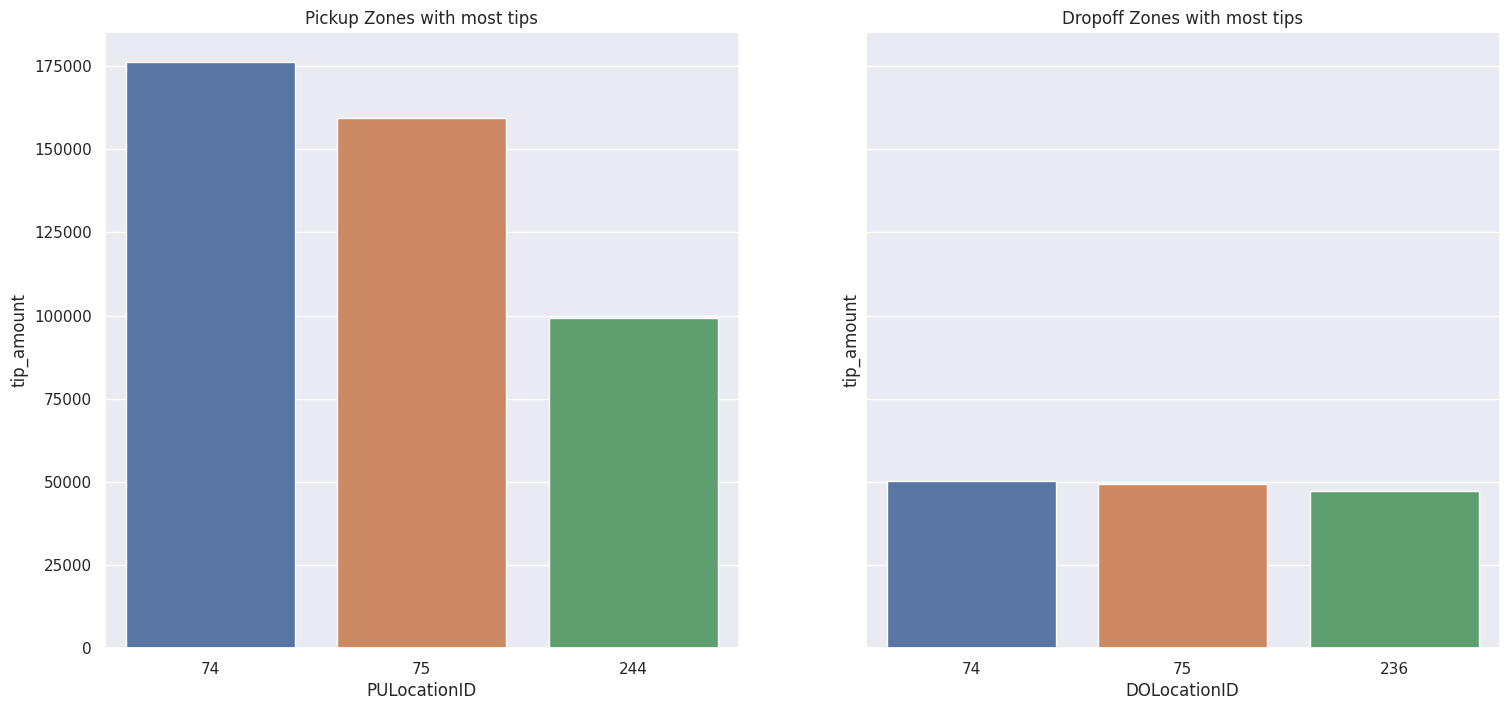

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8),sharey=True)
sns.barplot(x=PUtop3.index,y='tip_amount',data=PUtop3,ax=ax[0])
ax[0].set_title("Pickup Zones with most tips")

sns.barplot(x=DOtop3.index,y='tip_amount',data=DOtop3,ax=ax[1])
ax[1].set_title("Dropoff Zones with most tips")

f.savefig(path+"picture/Barplot of Top3 Zones with most tips")

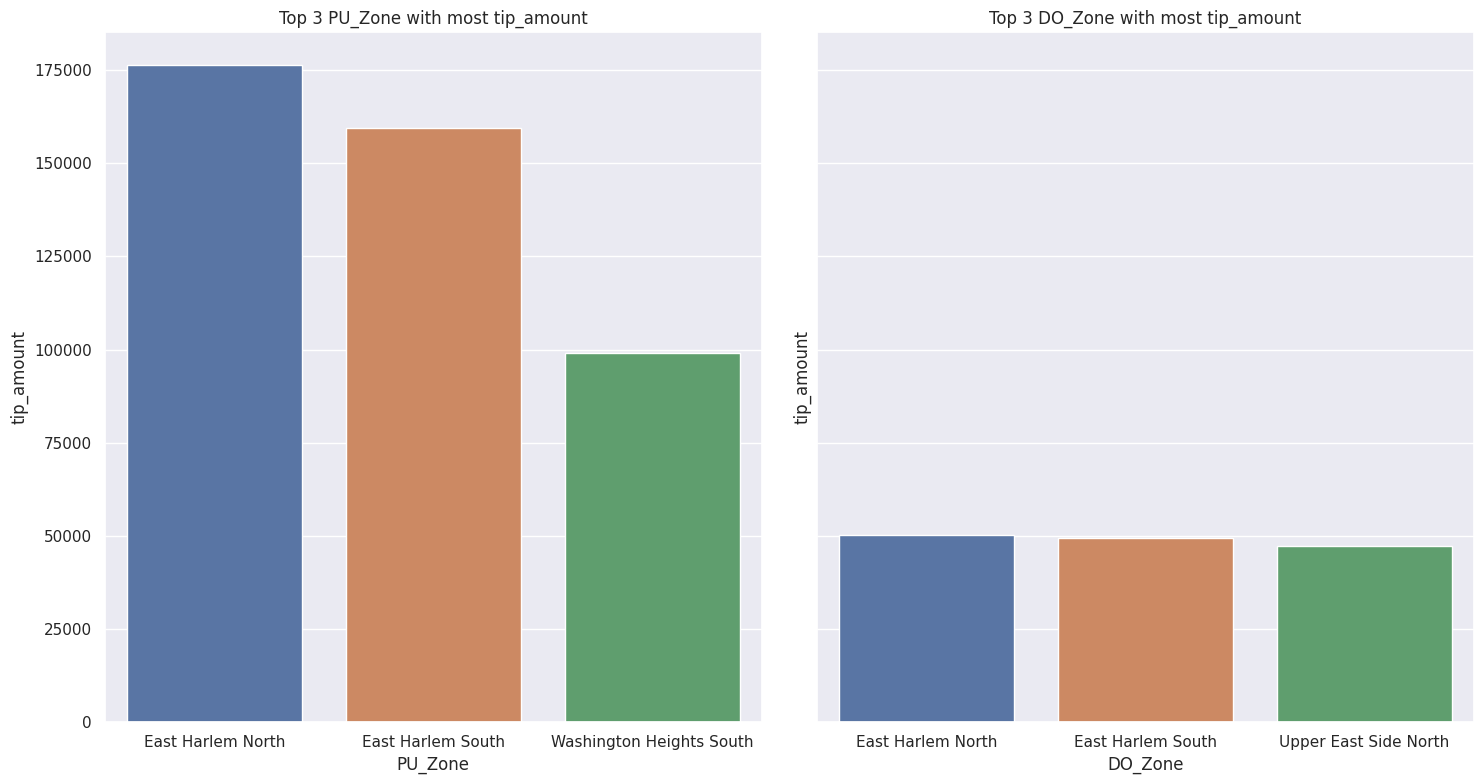

In [103]:
sumbar(pu="PU_Zone",do="DO_Zone",data=df_step4,y="tip_amount",top=3)

### 4.2.9 Visualize location variables with total_amount


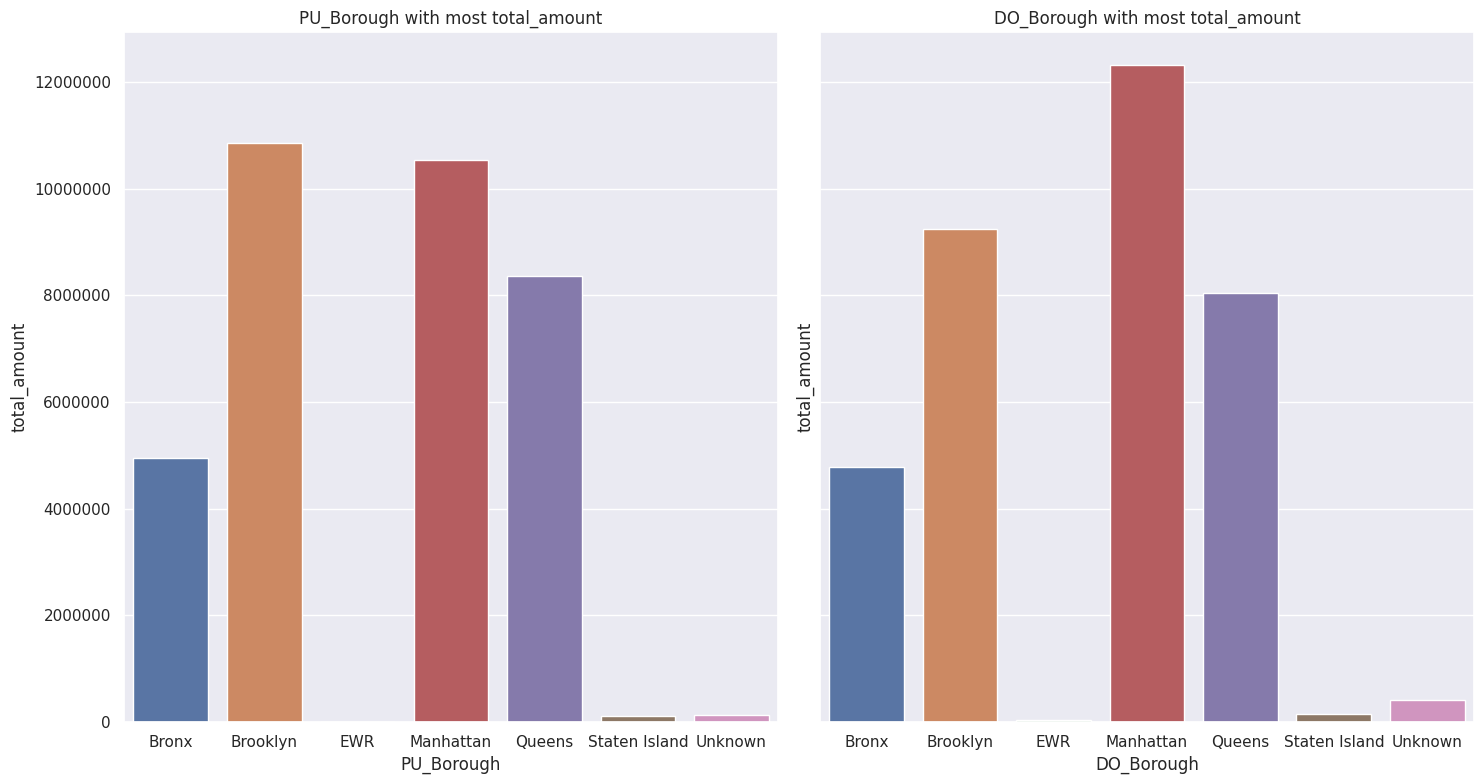

In [104]:
sumbar(pu="PU_Borough",do="DO_Borough",data=df_step4,y="total_amount")

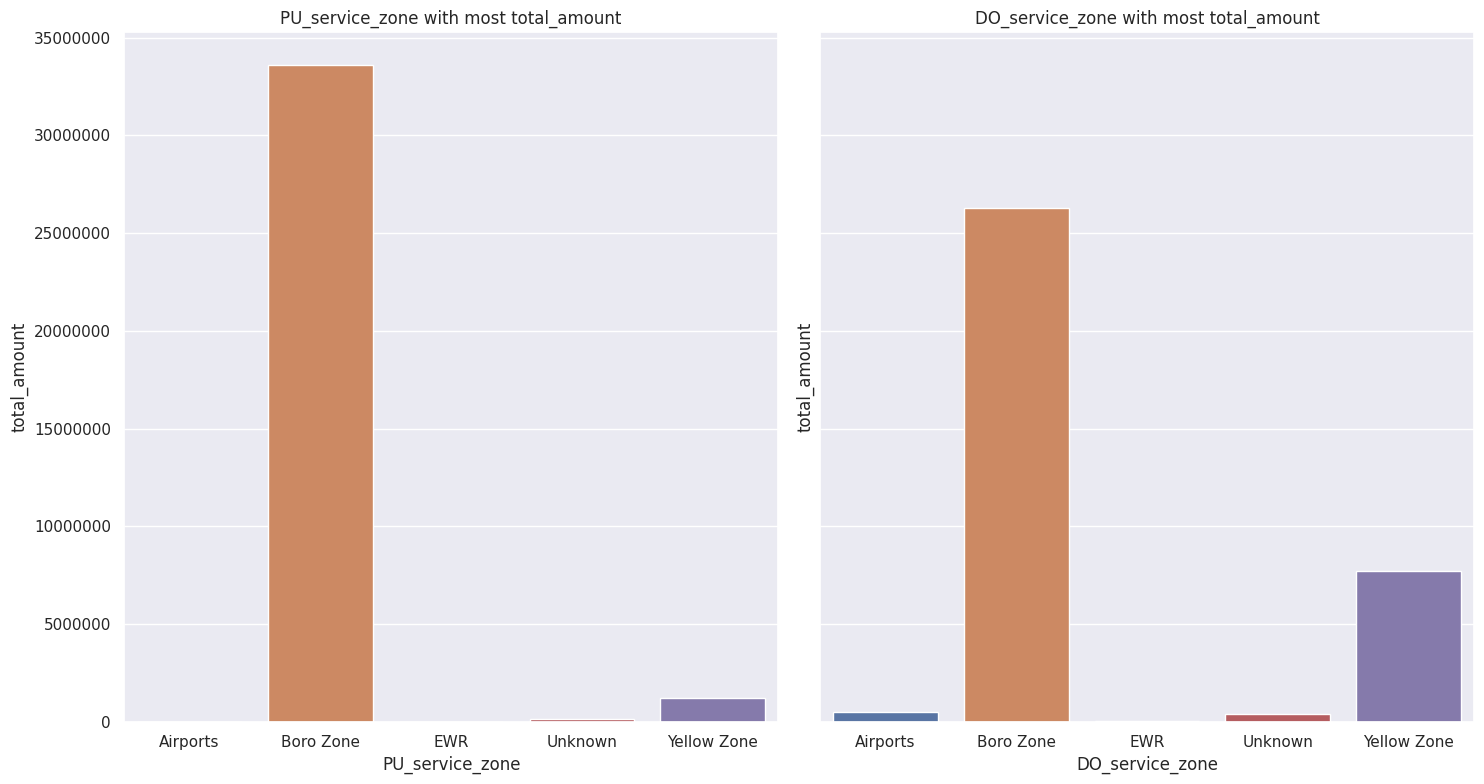

In [105]:
sumbar(pu="PU_service_zone",do="DO_service_zone",data=df_step4,y="total_amount")

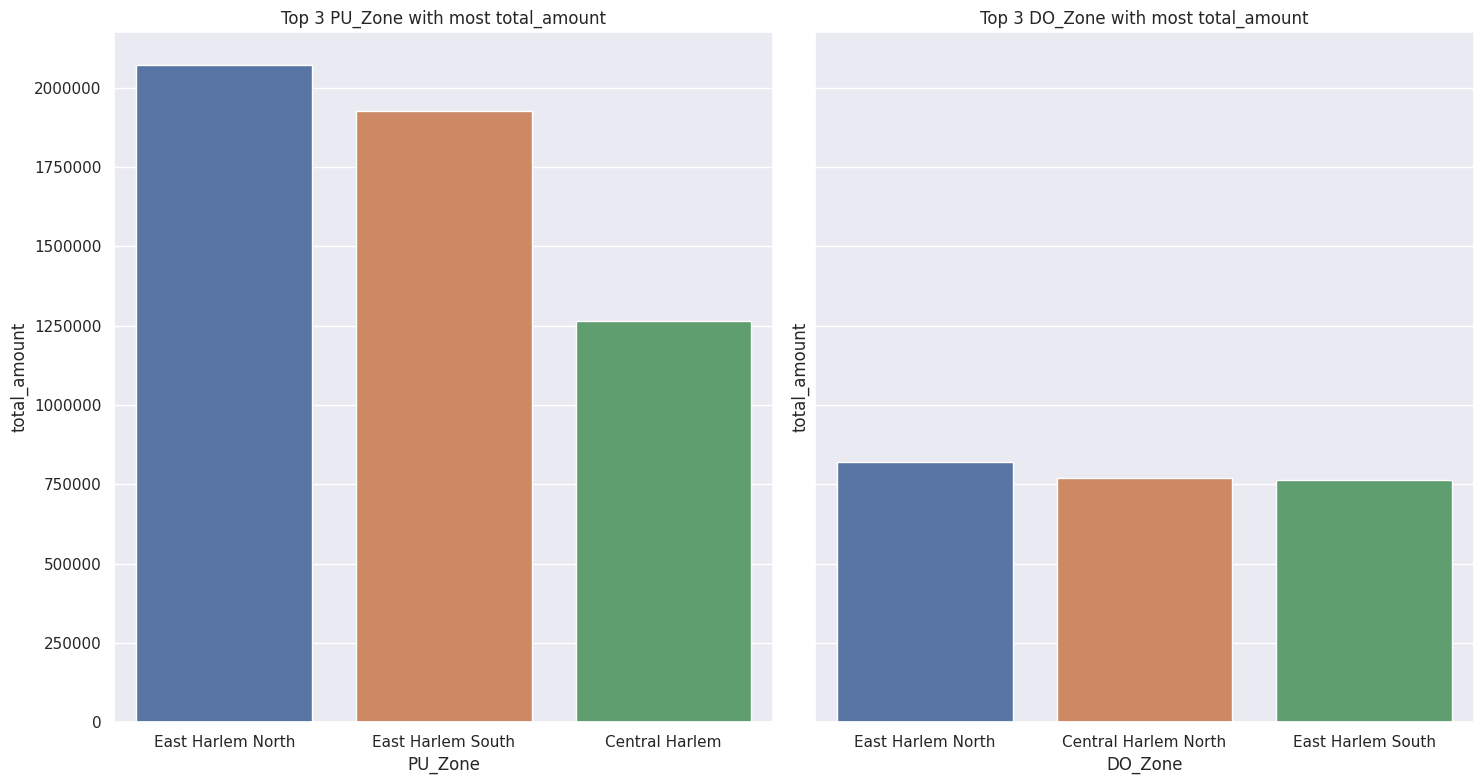

In [106]:
sumbar(pu="PU_Zone",do="DO_Zone",data=df_step4,y="total_amount",top=3)